# Modélisation, abstraction



# Poids des modes de consommation énergétiques cf. les types d'usages

In [1]:
from pepper_commons import *

✔ _data loaded
✔ struct loaded


In [2]:
from seattle_commons import clean_dataset
data = get_data()
_data, not_compliant, outliers = clean_dataset(data)


Removal of outliers


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,350,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,98101.0,0942000045,7,DOWNTOWN,47.60642,...,4.165040e+07,0.0,1.166315e+07,39794668.0,16048.309570,1604831.0,Non-Compliant,High outlier,362.66,2.10
384,539,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,98105.0,5335200380,4,NORTHEAST,47.66178,...,3.189628e+05,0.0,9.348260e+04,318963.0,0.000000,0.0,Non-Compliant,Low outlier,2.22,0.03
448,608,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,98104.0,5247800200,2,DOWNTOWN,47.59878,...,1.134876e+07,0.0,4.715030e+05,1608768.0,3430.500488,343050.0,Non-Compliant,Low outlier,29.43,0.19
517,704,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,98119.0,7666202110,7,MAGNOLIA / QUEEN ANNE,47.62235,...,2.713719e+07,0.0,7.953454e+06,27137187.0,0.000000,0.0,Non-Compliant,High outlier,189.18,1.46
720,19708,Multifamily HR (10+),High-Rise Multifamily,Bay Vista,2821 2nd Ave,98121.0,0586400000,7,DOWNTOWN,47.61706,...,2.589126e+06,0.0,6.265616e+05,2137828.0,2700.760010,270076.0,Non-Compliant,Low outlier,29.25,0.17


⇒ 32 outliers + Outlier column dropped

Removal of not compliant


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
22,28,SPS-District K-12,K-12 School,Graham Hill Elementary,5149 S. Graham St.,98118.0,1102000138,2,SOUTHEAST,47.54576,...,1539478.5,1713623.5,0.0,274605.9063,936955.0,6025.229004,602523.0,Error - Correct Default Data,38.53,0.69
28,34,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,98112.0,0688000090,3,Central,47.62266,...,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,Missing Data,0.00,0.00
30,36,SPS-District K-12,K-12 School,Jane Addams Middle,11051 34th Ave. N.E.,98125.0,0752000170,5,NORTH,47.70994,...,6779173.0,7800349.5,0.0,570809.1875,1947601.0,48315.718750,4831572.0,Error - Correct Default Data,270.18,1.68
31,37,SPS-District K-12,K-12 School,John Hay Elementary,201 Garfield St.,98109.0,0809000005,7,MAGNOLIA / QUEEN ANNE,47.63290,...,0.0,0.0,0.0,438691.6875,1496816.0,0.000000,0.0,Missing Data,10.43,0.20
38,51,SPS-District K-12,K-12 School,Eckstein Middle,3003 N.E. 75th St.,98115.0,0425049022,4,NORTHEAST,47.68252,...,6399127.5,7329817.5,0.0,468840.5000,1599684.0,47994.433590,4799443.0,Error - Correct Default Data,266.05,1.52


⇒ 133 not compliant + ComplianceStatus column dropped


In [3]:
cols = [
    'PropertyGFATotal',
    'SiteEnergyUse(kBtu)',
    'Electricity(kBtu)',
    'SteamUse(kBtu)',
    'NaturalGas(kBtu)', # ix computed
    'LargestPropertyUseType',
    'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseType',
    'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseType',
    'ThirdLargestPropertyUseTypeGFA',
    'ListOfAllPropertyUseTypes'
]

a = _data[cols]
a.columns = ['s', 'e', 'e1', 'e2', 'e3', 's1_label', 's1', 's2_label', 's2', 's3_label', 's3', 'sx_labels']
#display(a)

b = a[['s', 'e']].copy()
b['i1'] = round(a.e1 / a.e, 3)
b['i2'] = round(a.e2 / a.e, 3)
b['i3'] = round(a.e3 / a.e, 3)
b['ix'] = 1 - (b.i1 + b.i2 + b.i3)
display(b)

# pour faire la suite, je dois basculer de chantier et revenir :
# il faut autant de colonnes que de catégories d'usage, en les classant en ordre décroissant de surface totale
# c'est donc un retour sur l'analyses des catégories détaillées d'usages

#eu = _data[['PropertyGFAParking', 'PropertyGFABuilding(s)', ]].copy()

# s, e, i1, i2, i3, ix, u1, u2, u3, ux, ux_labels

# area.columns = ['x', 'y', 'z']
# area['x + y'] = area.x + area.y
# relevant, aber = exclude_irrelevants(area, ['z', 'x + y'])
# check, inconst = assert_const_ratio(relevant, 'z', 'x + y')

,s,e,i1,i2,i3,ix
0,88434,7.226362e+06,0.546,0.277,0.177,0.000
1,103566,8.387933e+06,0.387,0.000,0.613,0.000
2,956110,7.258702e+07,0.682,0.297,0.021,0.000
3,61320,6.794584e+06,0.408,0.326,0.267,-0.001
4,175580,1.417261e+07,0.379,0.000,0.621,0.000
...,...,...,...,...,...,...
3370,18261,9.320821e+05,0.678,0.000,0.322,0.000
3372,16000,9.502762e+05,0.417,0.000,0.583,0.000
3373,13157,5.765898e+06,0.311,0.000,0.689,0.000
3374,14101,7.194712e+05,0.485,0.000,0.515,0.000


# Clean Dataset

Ici j'entreprends de bâtir un premier dataset propre pour faire tourner mes premiers modèles.

In [8]:
from use_types_analysis import unique_uses_table
unique_uses = unique_uses_table(_data)
display(unique_uses)

,freq,area,%f,%a
Multifamily Housing,1665,9.725056e+07,0.287863,0.316416
Office,847,6.461354e+07,0.146438,0.210228
Parking,1072,3.807907e+07,0.185339,0.123895
College/University,27,1.463456e+07,0.004668,0.047615
Non-Refrigerated Warehouse,256,1.208134e+07,0.044260,0.039308
...,...,...,...,...
Swimming Pool,47,0.000000e+00,0.008126,0.000000
Outpatient Rehabilitation/Physical Therapy,2,0.000000e+00,0.000346,0.000000
Single Family Home,1,0.000000e+00,0.000173,0.000000
Energy/Power Station,1,0.000000e+00,0.000173,0.000000


In [9]:
unique_uses = unique_uses.reset_index()
display(unique_uses)

,index,freq,area,%f,%a
0,Multifamily Housing,1665,9.725056e+07,0.287863,0.316416
1,Office,847,6.461354e+07,0.146438,0.210228
2,Parking,1072,3.807907e+07,0.185339,0.123895
3,College/University,27,1.463456e+07,0.004668,0.047615
4,Non-Refrigerated Warehouse,256,1.208134e+07,0.044260,0.039308
...,...,...,...,...,...
62,Swimming Pool,47,0.000000e+00,0.008126,0.000000
63,Outpatient Rehabilitation/Physical Therapy,2,0.000000e+00,0.000346,0.000000
64,Single Family Home,1,0.000000e+00,0.000173,0.000000
65,Energy/Power Station,1,0.000000e+00,0.000173,0.000000


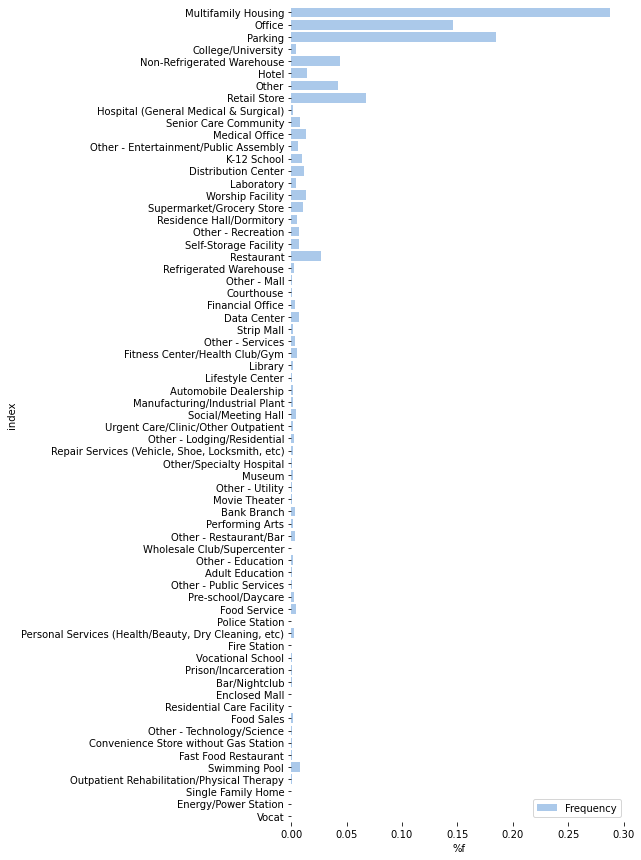

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes('pastel')
sns.barplot(x=r'%f', y='index', data=unique_uses,
            label='Frequency', color='b')

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(xlim=(0, 24), ylabel="",
#       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)
plt.show()

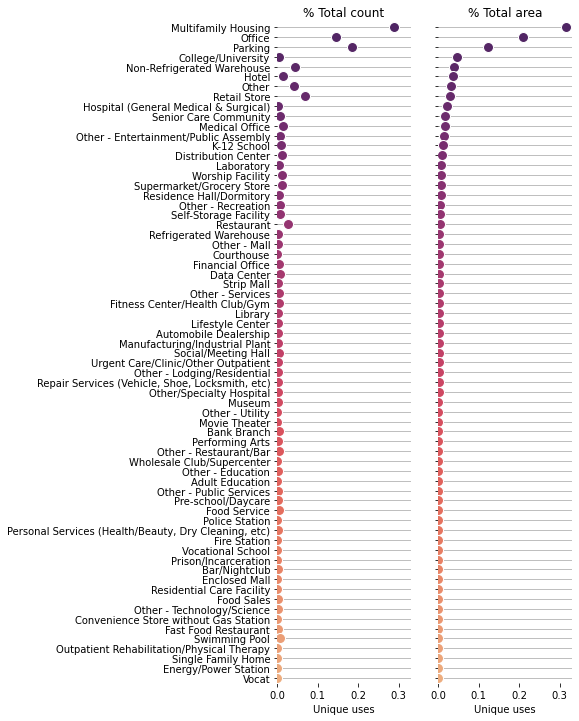

In [18]:
# Adaptation directe de : https://seaborn.pydata.org/examples/pairgrid_dotplot.html
# TODO : observer le graphique m'interpelle immédiatement sur la nécessité de compléter
# avec l'énergie et l'émission de gaz à effet de serre
# Je ne suis pas certain que ce soit le meilleur choix graphique.
# Utiliser un hue pour mettre les barres côte à côte serait + efficace cf. ce que j'ai fait dans monovar

import seaborn as sns
#sns.set_theme(style="whitegrid")

# Load the dataset
#crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(unique_uses, #crashes.sort_values("total", ascending=False),
                 x_vars=unique_uses.columns[-2:], y_vars=['index'],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient='h', jitter=False,
      palette='flare_r', linewidth=1, edgecolor='w')

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, .33), xlabel='Unique uses', ylabel='') # xlim=(0, 25), 

# Use semantically meaningful titles for the columns
titles = ['% Total count', '% Total area'] #, "Alcohol crashes",
          #"Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [5]:
from use_types_analysis import use_table
u_table = use_table(_data)
totals = u_table.sum()
display(u_table / totals)

,Unknown,Multifamily Housing,Office,Parking,College/University,Non-Refrigerated Warehouse,Hotel,Other,Retail Store,Hospital (General Medical & Surgical),...,Food Sales,Other - Technology/Science,Convenience Store without Gas Station,Fast Food Restaurant,Swimming Pool,Outpatient Rehabilitation/Physical Therapy,Single Family Home,Energy/Power Station,Vocat,nan
0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.007957,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,NaN
1,0.000000,0.0,0.000000,0.000396,0.0,0.0,0.007547,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,NaN
2,0.289253,0.0,0.000000,0.000000,0.0,0.0,0.068065,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,NaN
3,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.005517,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,NaN
4,-0.023002,0.0,0.000000,0.001788,0.0,0.0,0.011107,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,NaN
3372,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,NaN
3373,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,NaN
3374,0.000000,0.0,0.000004,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,NaN


### Encodage des catégories

In [6]:
# déplacée dans use_types_analysis + fonctions get_btype_id et get_ptype_id dans seattle_commons

# encodage des catégories
def unique_table(data, label):
    g = data[[label, 'PropertyGFATotal']]
    gb = g.groupby(by=label).agg(['count', 'sum'])
    gb.columns = ['freq', 'area']
    totals = gb.sum()
    gb[r'%f'] = gb.freq / totals.freq
    gb[r'%a'] = gb.area / totals.area
    gb = gb.sort_values(by='area', ascending=False)
    return gb

u = unique_table(_data, 'PrimaryPropertyType')
display(u)

bt = _data.PrimaryPropertyType
display(bt)

bt = _data.PrimaryPropertyType.map(lambda x: u.index.get_loc(x))
display(bt)


,freq,area,%f,%a
PrimaryPropertyType,,,,
Large Office,169,61685616,0.052632,0.200541
Mid-Rise Multifamily,553,50355886,0.172220,0.163708
Low-Rise Multifamily,956,41111601,0.297727,0.133655
Other,250,24477410,0.077857,0.079577
High-Rise Multifamily,103,21521758,0.032077,0.069968
University,25,15053475,0.007786,0.048939
Mixed Use Property,132,14135081,0.041109,0.045954
Small- and Mid-Sized Office,287,13427354,0.089380,0.043653
Hotel,76,12419512,0.023669,0.040376


0                    Hotel
1                    Hotel
2                    Hotel
3                    Hotel
4                    Hotel
               ...        
3370                 Other
3372                 Other
3373                 Other
3374    Mixed Use Property
3375    Mixed Use Property
Name: PrimaryPropertyType, Length: 3211, dtype: object

0       8
1       8
2       8
3       8
4       8
       ..
3370    3
3372    3
3373    3
3374    6
3375    6
Name: PrimaryPropertyType, Length: 3211, dtype: int64

In [7]:
y = _data['SiteEUI(kBtu/sf)']
display(y)
display(y.astype(int))

0        81.699997
1        94.800003
2        96.000000
3       110.800003
4       114.800003
           ...    
3370     51.000000
3372     59.400002
3373    438.200012
3374     51.000000
3375     63.099998
Name: SiteEUI(kBtu/sf), Length: 3211, dtype: float64

0        81
1        94
2        96
3       110
4       114
       ... 
3370     51
3372     59
3373    438
3374     51
3375     63
Name: SiteEUI(kBtu/sf), Length: 3211, dtype: int32

In [8]:
from use_types_analysis import use_table

# l'intensité de la consommation énergétique : c'est la target !!!
y = _data['SiteEUI(kBtu/sf)']
y_discr = y.astype(int)

# sur le premier jeu, on fait abstraction de la masse et de la structure du bâtiment

# retraits de base : outliers, non conformes (mais je conserve les multi family pour le moment)

#display(_data)

# mes outliers non corrigés
# là c'est un travail fin, qui reste à poursuivre, mais en prochaine itération (incréments)
# dans un premier temps, on élimine : ça demande immédiatement de réduire à une seule ligne
# ce qui est fait en bivarié => fait, mais bcp d'outliers s'expliquent

# encodage des catégories : il faut que j'étudie cela de plus près

# je conserve les colonnes suivantes (features) :

# type de bâtiment :
#types = _data[['BuildingType', 'PrimaryPropertyType']]

u_bt = unique_table(_data, 'BuildingType')
bt = _data.BuildingType.map(lambda x: u_bt.index.get_loc(x))

u_ppt = unique_table(_data, 'PrimaryPropertyType')
ppt = _data.PrimaryPropertyType.map(lambda x: u_ppt.index.get_loc(x))

# dimensions : # bâtiments et # étages et surface du bâtiment ==> on laisse de côté pour démarrer

# type d'usage : codage pour démarrer : suivant les surfaces totales décroissantes
# parts relatives de la surface (suivant les usages) [erreurs corrigées ou outliers virés] :
#    totale ext, totale int
#    ventilée cf. les 69 + 1 types d'usages (+1 unknown)
# TODO : là, je suis coincé tant que je n'ai pas corrigé les surfaces erronées
u_table = use_table(_data)
u_table = u_table / u_table.sum()

# parts relatives dans le mix énergétique (cf. énergie totale consommée), dont les erreurs sont corrigées :
#    ventilée cf. les 3 + 1 types d'énergies (+ 1 unknown)
e_table = _data[['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']]
e_table = e_table / e_table.sum()

# intensité d'émission de GES
g = _data.GHGEmissionsIntensity

X = pd.concat([bt, ppt, u_table, e_table, g], axis=1)

X = X.fillna(0)  # pour les 4 cas bien identifiés 23355, 25431, 25763, 50082
display(X)


,BuildingType,PrimaryPropertyType,Unknown,Multifamily Housing,Office,Parking,College/University,Non-Refrigerated Warehouse,Hotel,Other,...,Swimming Pool,Outpatient Rehabilitation/Physical Therapy,Single Family Home,Energy/Power Station,Vocat,nan,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity
0,0,8,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.007957,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.002190,0.000324,0.000287,2.83
1,0,8,0.000000,0.0,0.000000,0.000396,0.0,0.0,0.007547,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.000266,0.001156,2.86
2,0,8,0.289253,0.0,0.000000,0.000000,0.0,0.0,0.068065,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.023566,0.004063,0.000336,2.19
3,0,8,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.005517,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.002420,0.000227,0.000407,4.67
4,0,8,-0.023002,0.0,0.000000,0.001788,0.0,0.0,0.011107,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.000440,0.001979,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,5,3,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.000052,0.000067,1.11
3372,5,3,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.000033,0.000124,2.01
3373,5,3,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.000147,0.000893,16.99
3374,5,6,0.000000,0.0,0.000004,0.000000,0.0,0.0,0.000000,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.000000,0.000029,0.000083,1.57


In [9]:
# où sont les NaN ?~
subset = None
is_aberrant = lambda s: s.isna()
d = X[X.columns if subset is None else subset].copy()
is_ab = d.apply(is_aberrant).any(axis=1)
ab = X[is_ab]
re = X[~is_ab]
display(ab)

,BuildingType,PrimaryPropertyType,Unknown,Multifamily Housing,Office,Parking,College/University,Non-Refrigerated Warehouse,Hotel,Other,...,Swimming Pool,Outpatient Rehabilitation/Physical Therapy,Single Family Home,Energy/Power Station,Vocat,nan,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity


# Reprise du cours, application directe ici

A la fin, avec du kNN, j'obiens 3 %.. pas fameux ce premier essai.

Mais l'important, c'est de l'avoir fait.

In [97]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_discr, test_size=.3) # 30 % pour test

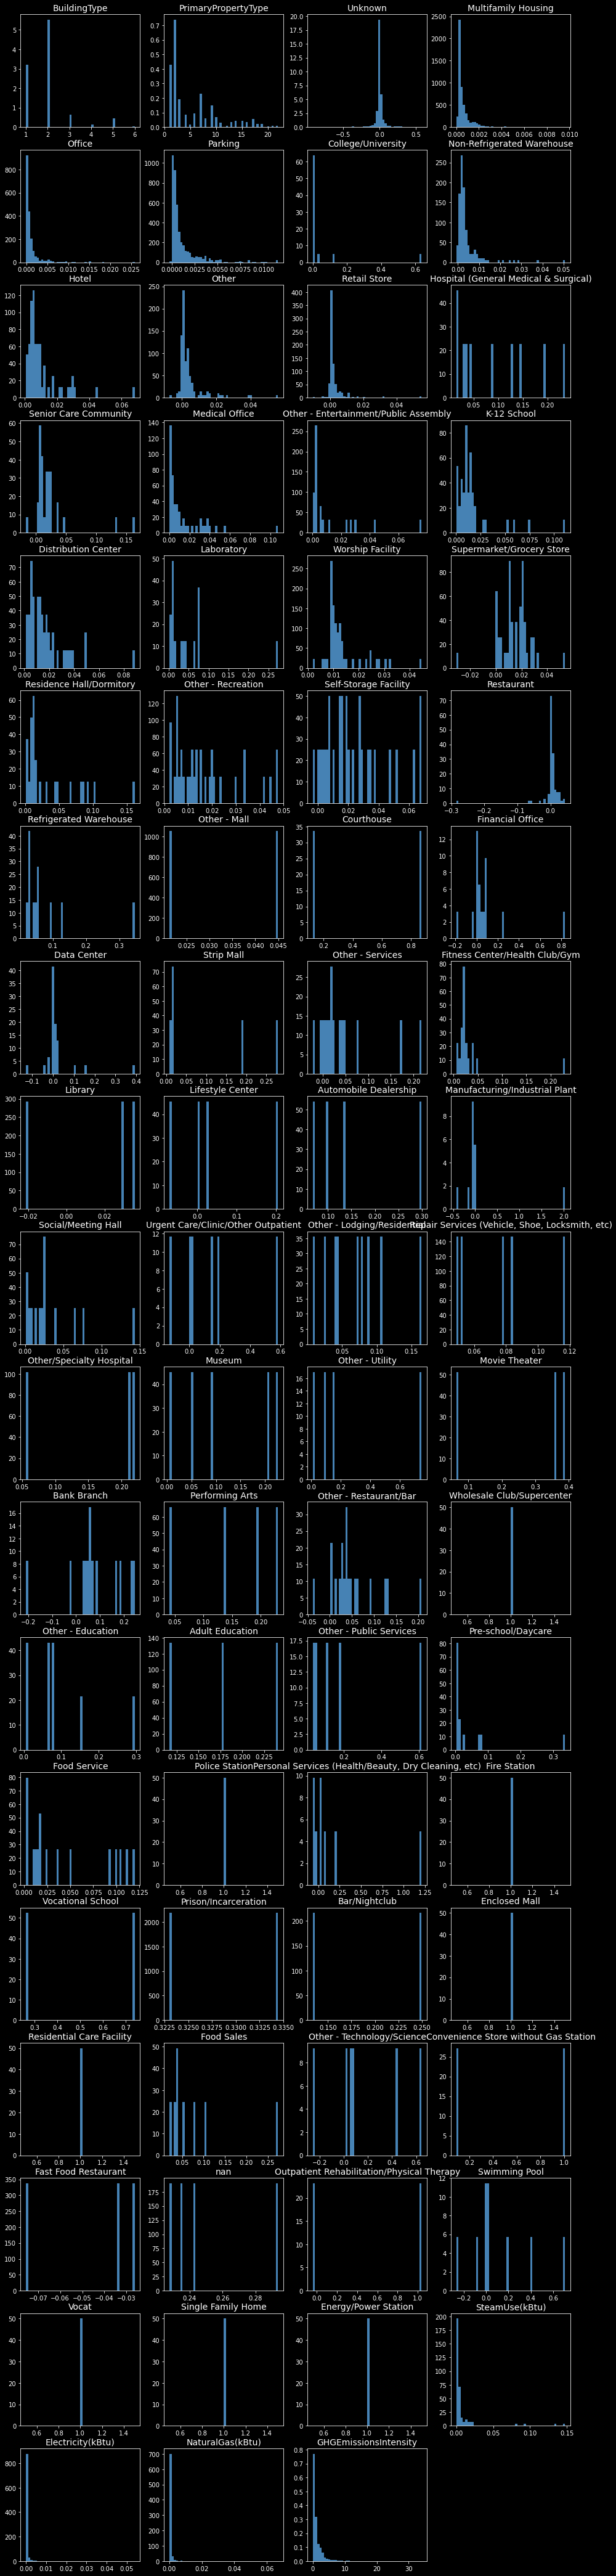

In [91]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('dark_background')
#np.seterr(invalid='ignore')
def histos(X, labels):
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    n_rows = 1 + (X.shape[1] // 4)
    f = plt.figure(figsize=(16, 4 * n_rows))
    for cid in range(X.shape[1]):#id, label in enumerate(X.columns):
        x = X[:, cid]
        x = x[x != 0]
        ax = f.add_subplot(n_rows, 4, cid + 1)
        h = ax.hist(x, bins=50, color='steelblue', density=True, edgecolor=None)
        ax.set_title(labels[cid], fontsize=14)

histos(X_train, X.columns)

In [92]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

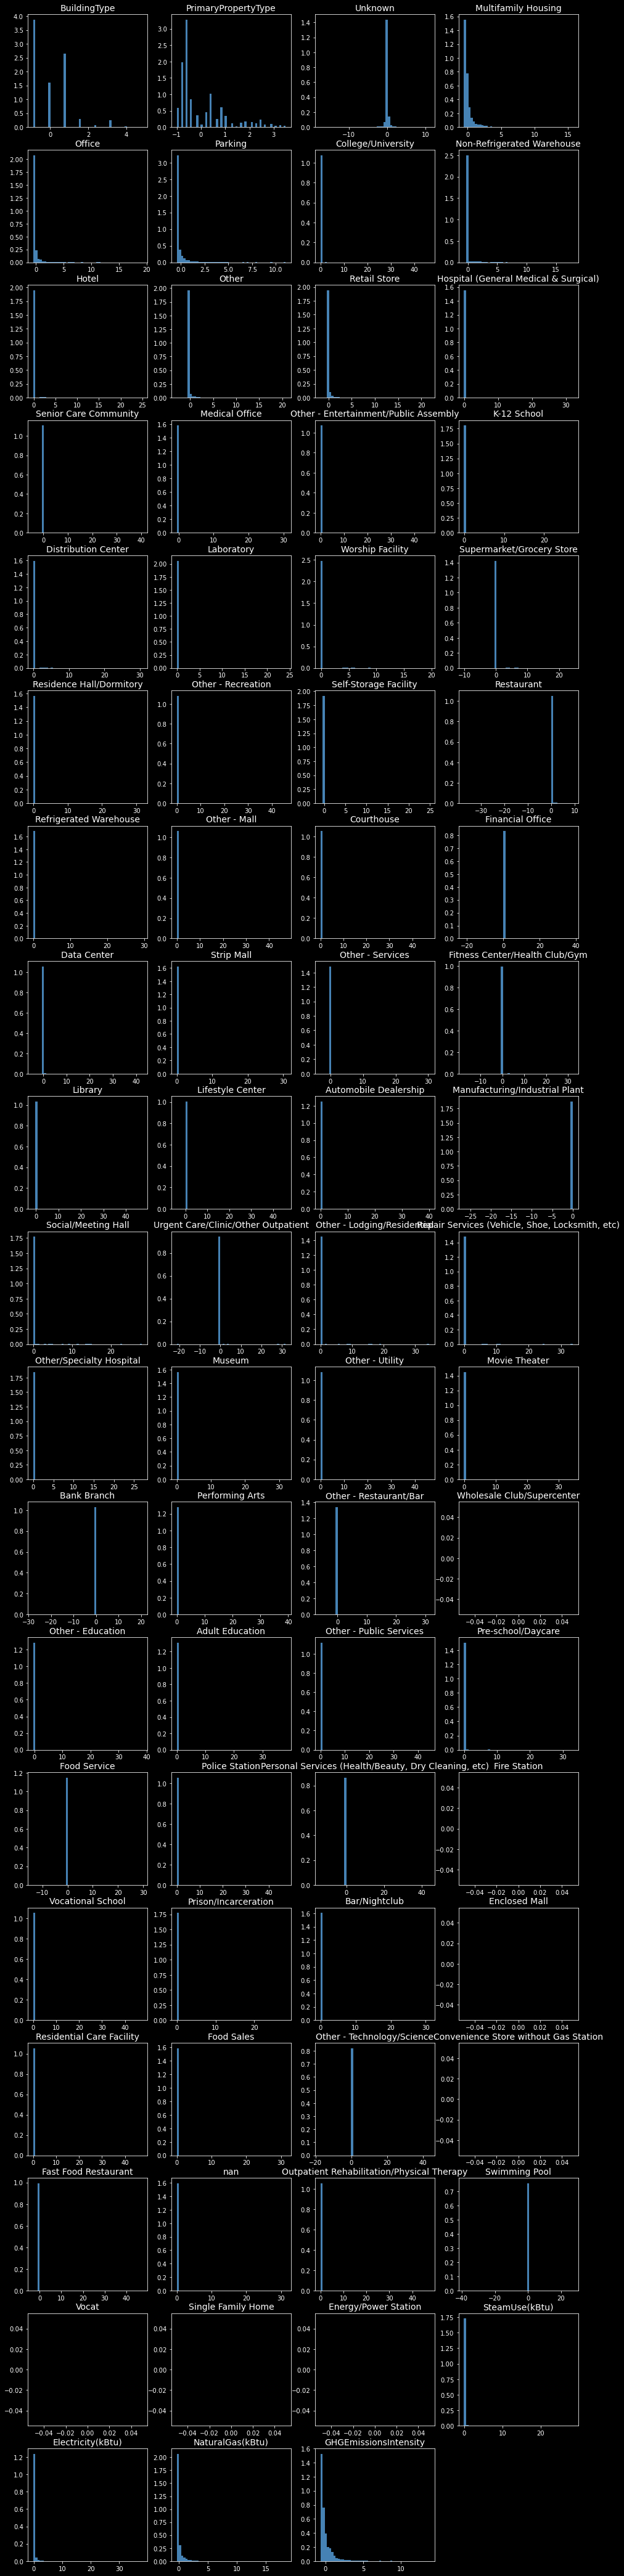

In [84]:
histos(X_train_std, X.columns)

In [99]:
from sklearn import neighbors, metrics

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}   # paramètres testés
score = 'accuracy'    # le score que l'on cherche à optimiser : ici la proportion de prédictions ok

# classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(),  # un classifieur kNN
    param_grid,                        # hyperparamètres à tester
    cv=5,                              # nombre de folds de validation croisée
    scoring=score                      # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print('Meilleur(s) hyperparamètre(s) sur le jeu d\'entraînement:')
print(clf.best_params_)

# Afficher les performances correspondantes
print('Résultats de la validation croisée :')
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'],  # score moyen
        clf.cv_results_['std_test_score'],   # écart-type du score
        clf.cv_results_['params']            # valeur de l'hyperparamètre
    ):
    print(f'{score} = {mean:.3f} (+/-{std * 2:.03f}) for {params}')

c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 5}
Résultats de la validation croisée :
accuracy = 0.016 (+/-0.014) for {'n_neighbors': 1}
accuracy = 0.020 (+/-0.006) for {'n_neighbors': 2}
accuracy = 0.024 (+/-0.009) for {'n_neighbors': 3}
accuracy = 0.026 (+/-0.008) for {'n_neighbors': 4}
accuracy = 0.027 (+/-0.012) for {'n_neighbors': 5}
accuracy = 0.024 (+/-0.009) for {'n_neighbors': 6}
accuracy = 0.022 (+/-0.004) for {'n_neighbors': 7}
accuracy = 0.019 (+/-0.007) for {'n_neighbors': 8}
accuracy = 0.016 (+/-0.008) for {'n_neighbors': 9}
accuracy = 0.015 (+/-0.009) for {'n_neighbors': 10}
accuracy = 0.018 (+/-0.008) for {'n_neighbors': 11}
accuracy = 0.020 (+/-0.009) for {'n_neighbors': 12}
accuracy = 0.018 (+/-0.014) for {'n_neighbors': 13}
accuracy = 0.017 (+/-0.017) for {'n_neighbors': 14}
accuracy = 0.016 (+/-0.009) for {'n_neighbors': 15}


# 21/09 Réattaque sur des parties

J'ai enfin suivi le cours sur l'évaluation des performances de modèles jusqu'au bout (me reste le TP final).

Sur cette base, je comprends mieux les termes que j'ai vu employés sur Discord hier soir.

Dans cette réattaque, je me propose le plan suivant, ciblé :
* ✔ repartir de num_bivar_analysis et cibler les cas tordus ou la linéarité n'est pas respectée.
* produire (fonctions toutes faites prêtes à l'emploi) les sous-tables de données, avec exclusion de ce qui doit l'être, correction (basique) de ce qui doit l'être. Les deux predict, naïf, manuel humain et IA peuvent ainsi être mis en concurrence pour montrer leurs performances respectives.
* faire ma fonction predict et une predict de sklearn (en tester plein de différentes). Ma fonction sera considérée comme l'une des naïves de référence (mais je vais faire les autres du cours pour jouer le jeu).
* l'objectif est d'utiliser le ML déjà au stade du feature engineering, pour réparer les données incorrectes / pour identifier les outliers.

Retour 2j en arrière.

## EUI Source / Site


`'SourceEUI(kBtu/sf)'` l'**intensité de la consommation d'énergie** (EUI) est la consommation d'énergie source d'une propriété divisée par sa surface de plancher brute. La consommation d'énergie source est l'énergie annuelle utilisée pour exploiter la propriété, y compris les pertes de production, de transmission et de distribution. L'EUI source est mesurée dans des milliers d'unités thermiques britanniques (KBTU) par pied carré.

`'SiteEUI(kBtu/sf)'` l'**intensité de la consommation d'énergie du site** (EUI) est la consommation d'énergie du site d'une propriété divisée par sa surface de plancher brute. La consommation d'énergie du site est le montant annuel de toute l'énergie consommée par la propriété sur place, comme indiqué sur les factures de services publics. Le site EUI est mesuré en milliers d'unités thermiques britanniques (KBTU) par pied carré.

Etude du rapport entre :
* `'SourceEUI(kBtu/sf)'`
* `'SiteEUI(kBtu/sf)'`

Bilan :
* Rapport non constant :
    - un pic (mode) sur un rapport maximum (sauf outliers) $E_{Source} = 3.142857 E_{Site}$
    - des rapports qui se distribuent ensuite entre 1.25 et ce maximum
    - nb > un ratio < 1 serait aberrant, mais aucun cas de ce type n'est présent dans le jeu de données.
* Exclusion de 4 <mark> Qui, pourquoi ?</mark>.
* Outliers hors l'intervalle 1.25, 3.142857 :
    - 6 individus aberrants dont la valeur source est nulle [505, 513, 755, 1323, 1883, 2791]
    - 1 low outlier avec un rapport à peine supérieur à 1 (1.05) [426] (Proche de la centrale ?)
    - 2 low outliers dont les rapports sont 0.28 et 0.41, ce qui est a priori impossible [3206, 2761]
    - 3 high outliers dont les rapports sont 4.66, 5.16 et 13.72 [46, 3350, 529]

Théorie : le rapport exprime le coût réel de production de l'énergie consommée, en prenant en compte les pertes de l'opérateur sur son réseau de distribution. On peut pousser l'hypothèse - qui pourrait être vérifiée - à une déperdition qui dépend de la distance à la centrale de production. Cependant, cette dernière hypothèse est molle face à un maximum constant où se concentre la plus grande partie des individus.


Théorie 2 : ce sont simplement des erreurs de troncature sur le calcul amont des ratios d'intensité (conso / surface).

Mon sentiment c'est qu'il y a un truc, un verrou, une erreur numérique qq part qui s'est propagée. Si je la trouve, je déverrouille, car je comprends et je peux rectifier. Le pb, c'est qu'il y a actuellement des erreurs constatées à plusieurs niveaux (surfaces, énergies).

Indices :
* les sites EUI n'ont qu'un chiffre significatif et des erreurs de troncature sur le reste de la mantisse.
* ... bon, ce 21/09 au soir, je reste perplexe.. j'espère avancer davantage côté surfaces

In [10]:
# retour d'abord sur les outliers
# un truc pas fait, c'est déduire les deux valeurs de surface de source et site intensité
# et de la comparer à la surface enregistrée
#display(_data)
d = _data[['BuildingType', 'PrimaryPropertyType', 'PropertyGFATotal',
'SiteEnergyUse(kBtu)', 'SiteEnergyUse(kBtu)', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)']].copy()
d.columns = ['b_type', 'p_type', 's', 'site_eu', 'site_eui_calc', 'site_eui', 'source_eui']
x = d.site_eui
y = d.source_eui
r = d['ratio'] = y / x
d.site_eui_calc = d.site_eu / d.s
print_subtitle('SourceEUI data is null')
display(d[y == 0])
"""
ID Village Square 2
IUC- Whole Foods Interbay
Union Bay Apartments
Minor Tower Apartments
BRIDGE PARK HOLIDAY RETIREMENT
New Central
"""
print_subtitle('Low outliers : SourceEUI/SiteEUI < 1')
display(d[(y > 0) & (r < 1)]) # ca fait 10 et pas 3

print_subtitle('High outliers : SourceEUI/SiteEUI > 3.62')
display(d[(r > 3.62)]) # ca fait 10 et pas 3


SourceEUI data is null


,b_type,p_type,s,site_eu,site_eui_calc,site_eui,source_eui,ratio
505,Multifamily MR (5-9),Mid-Rise Multifamily,228288,5974993.5,26.173051,55.599998,0.0,0.0
513,NonResidential,Supermarket / Grocery Store,57176,12525174.0,219.063488,208.800003,0.0,0.0
755,Multifamily MR (5-9),Mid-Rise Multifamily,86525,2321336.0,26.828500,37.000000,0.0,0.0
1323,Multifamily LR (1-4),Low-Rise Multifamily,37361,880115.5,23.557065,31.700001,0.0,0.0
1883,Multifamily LR (1-4),Senior Care Community,144682,5121586.0,35.398916,35.400002,0.0,0.0
2791,NonResidential,Mixed Use Property,49299,4729846.5,95.942037,89.199997,0.0,0.0



Low outliers : SourceEUI/SiteEUI < 1


,b_type,p_type,s,site_eu,site_eui_calc,site_eui,source_eui,ratio
2761,NonResidential,Retail Store,24550,977230.3125,39.805715,39.799999,16.4,0.41206
3206,NonResidential,Small- and Mid-Sized Office,52000,342726.0938,6.590886,7.100000,2.0,0.28169



High outliers : SourceEUI/SiteEUI > 3.62


,b_type,p_type,s,site_eu,site_eui_calc,site_eui,source_eui,ratio
46,NonResidential,Small- and Mid-Sized Office,59400,5071974.00,85.386768,85.400002,398.700012,4.668618
529,NonResidential,Retail Store,86204,3241917.00,37.607501,43.500000,596.799988,13.719540
3350,Multifamily LR (1-4),Low-Rise Multifamily,51095,2751301.25,53.846781,55.799999,288.100006,5.163083


## Surface totale / intérieure et extérieure

# Objectif : correction surfaces

Il y a de nombreuses incohérences dans les surfaces, notamment avec le cas des Parkings.

L'objet de cette section est :
1. d'identifier les enregistrements qui posent problème (pour éventuellement les exclure de la modélisation)
2. de mieux comprendre la nature des erreurs
3. de les corriger, au moins d'en corriger une partie

=> Faire un nb spécifique, ou en faire une section de feature engineering.

## Rappel de la problématique 

Surface / sa ventilation par usage : voir `num_bivar.analysis.ipynb`

Nous avons validé que la relation `'PropertyGFAParking' + 'PropertyGFABuilding(s)' = 'PropertyGFATotal'` ($s = s_e + s_i$) était parfaitement satisfaite par l'ensemble des individus.

**Q** - *La surface totale est-elle systématiquement la sommes des surfaces par usage ?*

**NB** - le cas du parking est spécial : il faut vérifier qu'il y a cohérence entre la surface indiquée dans `'PropertyGFAParking'` et celle indiquée dans l'éventuel des 3 usages ventilés ayant pour label `'Parking'`.

Bilan :
* Pas d'exclusion
* 72 % d'individus vérifient la relation (erreur tolérée 1 pour 1000).
* 28 % ne la vérifient pas ... <mark>Analyse à poursuivre en réutilisant l'histogramme pentes</mark>
* Pour les 593 propriétés avec parking, les inconsistances dépassent les consistances.. quelque chose ne va pas.

Formalisation et méthode :

Voir `multi_index_demo.ipynb` pour la définition de toutes les variables formelles.

Ici, nous utilisons ce sous-ensemble :
* $U=\{u_k, k=0, ...\}$ ⚪ `'u_0', ...` ⚪ Ensemble des labels d'usages, ordonnés par surface totale décroissante.
* $S_U = \{s_{u_k}|u_k \in U\}$ ⚪ `'s_u_0', ...` ⚪ Part de surface dédiée à chaque usage.
* $s_u$ ⚪ `'s_u'` ⚪ $\sum_{u_k \in U}{s_{u_k}}$
* $s_e$ ⚪`'s_e'` ⚪ `'PropertyGFAParking'`
* $s_i$ ⚪ `'s_i'` ⚪ `'PropertyGFABuilding(s)'`
* $s$ ⚪ `'s'` ⚪ `'PropertyGFATotal'` ⚪ $s=s_e+s_i$
* $u_{\text{1st}}, u_{\text{2nd}}, u_{\text{3rd}}$ ⚪ `'u_1st', u_2nd, u_3rd` ⚪ `'LargestPropertyUseType'`, etc
* $s_{\text{1st}}, s_{\text{2nd}}, s_{\text{3rd}}$ ⚪ `'s_1st', s_2nd, s_3rd` ⚪ `'LargestPropertyUseTypeGFA'`, etc~

Les utilitaires clés :
* `use_types_analysis.use_table` :
    - elle dérive la table $S_U$ de $s_{\text{1st}}, s_{\text{2nd}}, s_{\text{3rd}}$
    - en complément, elle produit ces vecteurs analytiques :
        - $s_u = s_{\text{1st}} + s_{\text{2nd}} + s_{\text{3rd}}$ ⚪ `'s_u'`
        - $\Delta s = s - s_u$ ⚪ `'s - s_u'`
        - $s_{u_e}$ ⚪ `'se_u'` ⚪ La surface de Parking telle que renseignée dans l'un de $s_{\text{1st}}, s_{\text{2nd}}, s_{\text{3rd}}$
        - $\Delta s_e = s_e - s_{u_e}$ ⚪ `'se - se_u'`
        - $s_{u_i} = s_u - s_{u_e}$ ⚪ `'si_u'` ⚪ La somme des surfaces ventilées autres que l'éventuelle surface de Parking
        - $\Delta s_i = s_i - s_{u_i}$ ⚪ `'si - si_u'`

La méthode de détection des anomalies et les mesures pour les traiter :

In [ ]:
# je n'ai plus les idées très claires, j'arrête pour ce soir, mais voici ma stratégie pour les surfaces :
# repartir du tableau qui met les sous-surfaces en 69 + 1 colonnes
# pour chaque propriété qui a un parking (cf. num_bivar_analysis) :
#   Parking not in detailed uses s > 0, s_2 = 0 (146) => l'y ajouter
#       Attention, cas tordus comme pour 655 : tot. 117950, ext. 11210, int. 106740, usage 1 multifamily : 117950
#       Dans ce cas, il faut également retrancher 11210 à multifamily
#       En d'autres termes, il faut coupler cette analyse-réparation avec celle de la surface tot. vs. somme détails
#   Parking is under accounted s > s_2 > 0 (144) : là il faut corriger soit s, soit s_2 : idem s vs sum(s-details)
#   Parking is over accounted s_2 > s > 0 (72) : idem
#   => tout cela serait plus simple en GSheet, mais la mise à plat en 69 + 1 cols est délicate dans cet env.
#   => En revanche, ce que je peux tout à faire, c'est de l'exporter vers la GSheet
#   => NB > cette vérification n'est pas faite dans num_bivar mais ??? => mettre un renvoi dans num_bivar
#   MAIS commencer par terminer mon onglet outliers dans GSheet

In [8]:
# utilitaires
def join_use_allocation(subset, data):
    main_uses = data.loc[subset.index, 'ListOfAllPropertyUseTypes':'ThirdLargestPropertyUseTypeGFA']
    return subset.join(main_uses.fillna('_'), how='left')

In [3]:
# données de base
d = _data[['BuildingType', 'PrimaryPropertyType', 'PropertyGFATotal',
    'PropertyGFAParking', 'PropertyGFABuilding(s)']].copy()
d.columns = ['btype', 'ptype', 's', 'se', 'si']

# données dérivées de la ventilation des surfaces
from use_types_analysis import use_table_2
use_table, s_u, s_diff, se_u, se_diff, si_u, si_diff = use_table_2(_data)


table = pd.concat([d, s_u, se_u, si_u, s_diff, se_diff, si_diff, use_table], axis=1)
_table = table[table.columns[:11]]
display(_table)

# Sdiff (Unknown verif calc) = S - SUM(Su)
# Spdiffx : Sext - Sup
# Meilleure conception  : use_table sans Unkown => on le fait ici
# changer les noms de cols pour u1, u2, etc ? à voir..

# algo (une fois table assemblée)
# 1. retirer tout ce qui est ok (1503 cas)
# 2. diviser ce qui est ko en classes cf.nature pb (982 diff > 0, 726 diff < 0)
# 3. représentation graphique du pb
# 4. corriger le pb et montrer graphiquement qu'il l'est

,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u
0,NonResidential,Hotel,88434,0,88434,88434,0,88434,0,0,0
1,NonResidential,Hotel,103566,15064,88502,103566,15064,88502,0,0,0
2,NonResidential,Hotel,956110,196718,759392,756493,0,756493,199617,196718,2899
3,NonResidential,Hotel,61320,0,61320,61320,0,61320,0,0,0
4,NonResidential,Hotel,175580,62000,113580,191454,68009,123445,-15874,-6009,-9865
...,...,...,...,...,...,...,...,...,...,...,...
3370,Nonresidential COS,Other,18261,0,18261,18261,0,18261,0,0,0
3372,Nonresidential COS,Other,16000,0,16000,16000,0,16000,0,0,0
3373,Nonresidential COS,Other,13157,0,13157,13157,0,13157,0,0,0
3374,Nonresidential COS,Mixed Use Property,14101,0,14101,13586,0,13586,515,0,515


## Les classes de cas

Les cas particuliers sont nombreux ce qui complique cette opération.

Commençons par isoler les classes de cas suivant des critères formels.

Partons d'une propriété clé qui résulte des définitions et de l'identité vérifiée : $\Delta s = \Delta s_i + \Delta s_e$ (A)

Suivant les cas $\Delta x = 0, \gt 0, \lt 0, x=s, s_i,  s_e$, on peut isoler en principe $3^3 = 27$ cas.

Mais la relation (A) entraîne qu'il n'y a que 13 cas possibles, puisque les 14 autres ne la satisfont pas.

Le tableau suivant définit les classes correspondant à ces cas :

NB > zoomer sur chaque cas avant de trop orienter les traitements.

|Classe|$\Delta s$|$\Delta s_i$|$\Delta s_e$|#cas|Commentaire/correction|
|-|-|-|-|-|-|
|1|= 0|= 0|= 0|1278|Tout est ok|
|2|= 0|> 0|< 0|182|Transfert $s_{u_i} \rightarrow s_{u_e}$|
|3|= 0|< 0|> 0|43|Transfert $s_{u_e} \rightarrow s_{u_i}$|
|4|> 0|= 0|> 0|23|Enregistrement $s_{u_e}$|
|5|> 0|> 0|= 0|621|Enregistrement $s_{u_i}$|
|6|> 0|> 0|> 0|96|Enregistrement $s_{u_e}$ et $s_{u_i}$|
|7|> 0|> 0|< 0|179||
|8|> 0|< 0|> 0|63||
|9|< 0|= 0|< 0|117||
|10|< 0|> 0|< 0|107||
|11|< 0|< 0|= 0|355||
|12|< 0|< 0|> 0|67||
|13|< 0|< 0|< 0|80||

In [4]:
s_eq_su = _table['s - s_u'] == 0
s_lt_su = _table['s - s_u'] < 0
s_gt_su = _table['s - s_u'] > 0
s_neq_su = ~s_eq_su

si_eq_siu = _table['si - si_u'] == 0
si_lt_siu = _table['si - si_u'] < 0
si_gt_siu = _table['si - si_u'] > 0
si_neq_siu = ~si_eq_siu

se_eq_seu = _table['se - se_u'] == 0
se_lt_seu = _table['se - se_u'] < 0
se_gt_seu = _table['se - se_u'] > 0
se_neq_seu = ~se_eq_seu

class_1 = s_eq_su & si_eq_siu
class_2 = s_eq_su & si_gt_siu
class_3 = s_eq_su & si_lt_siu

class_4 = s_gt_su & si_eq_siu & se_gt_seu
class_5 = s_gt_su & si_gt_siu & se_eq_seu
class_6 = s_gt_su & si_gt_siu & se_gt_seu
class_7 = s_gt_su & si_gt_siu & se_lt_seu
class_8 = s_gt_su & si_lt_siu & se_gt_seu

class_9 = s_lt_su & si_eq_siu & se_lt_seu
class_10 = s_lt_su & si_gt_siu & se_lt_seu
class_11 = s_lt_su & si_lt_siu & se_eq_seu
class_12 = s_lt_su & si_lt_siu & se_gt_seu
class_13 = s_lt_su & si_lt_siu & se_lt_seu

## $\Delta s = 0 \Leftrightarrow s = s_u$<br/>Classes 1, 2, 3<br/>1503 cas, 47 % des cas

In [5]:
nil_s_diff = _table[s_eq_su]
display(nil_s_diff)

,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u
0,NonResidential,Hotel,88434,0,88434,88434,0,88434,0,0,0
1,NonResidential,Hotel,103566,15064,88502,103566,15064,88502,0,0,0
3,NonResidential,Hotel,61320,0,61320,61320,0,61320,0,0,0
7,NonResidential,Other,102761,0,102761,102761,0,102761,0,0,0
8,NonResidential,Hotel,163984,0,163984,163984,0,163984,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3365,Nonresidential COS,Other,12769,0,12769,12769,0,12769,0,0,0
3367,Nonresidential COS,Other,23445,0,23445,23445,0,23445,0,0,0
3370,Nonresidential COS,Other,18261,0,18261,18261,0,18261,0,0,0
3372,Nonresidential COS,Other,16000,0,16000,16000,0,16000,0,0,0


### Cas validés (classe 1)<br/>1278 cas, 40 % des cas

Cas pour lesquels $\Delta s = \Delta s_i = \Delta s_e = 0$.

In [6]:
class_1_members = _table[class_1]
display(class_1_members)

,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u
0,NonResidential,Hotel,88434,0,88434,88434,0,88434,0,0,0
1,NonResidential,Hotel,103566,15064,88502,103566,15064,88502,0,0,0
3,NonResidential,Hotel,61320,0,61320,61320,0,61320,0,0,0
7,NonResidential,Other,102761,0,102761,102761,0,102761,0,0,0
8,NonResidential,Hotel,163984,0,163984,163984,0,163984,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3365,Nonresidential COS,Other,12769,0,12769,12769,0,12769,0,0,0
3367,Nonresidential COS,Other,23445,0,23445,23445,0,23445,0,0,0
3370,Nonresidential COS,Other,18261,0,18261,18261,0,18261,0,0,0
3372,Nonresidential COS,Other,16000,0,16000,16000,0,16000,0,0,0


### Cas incohérents (classe 2)<br/>182 cas, 6 % des cas

Ce sont  les cas où $\Delta s = 0$, $\Delta s_i \gt 0$, et $\Delta s_e \lt 0$.

Cela signifie que si la surface totale et la somme de ses surfaces par usage coïncident, la quantité de surface de Parking renseignée dans `'PropertyGFAParking'` diffère de celle qui apparaît dans l'un des 3 `'LargestPropertyUseTypeGFA'`, etc

Le traitement consiste à rectifier la ventilation et éventuellement `'ListOfAllPropertyUseTypes'`.

Dans tous les cas, nous fixons $s, s_e, s_i$ comme référence et corrigeons les $s_{u_k}$ pour les mettre en cohérence.

Plusieurs cas sont à distinguer selon que :
* la surface de Parking fait partie de la ventilation ou non ($s_{u_e} = 0$).
* les 3 places de ventilation sont déjà prises ou non ($n_u = 3$).
* il n'y a pas de surface par usage autre que Parking ($s_{u_i} = 0$).

Les traitements :
* si la surface de Parking fait partie de la ventilation : ajout de la quantité $\Delta s_e$ à cette surface, et :
    - si $n_u > 1$ (équivalent à ($s_{u_i} \ne 0$)) retrait de la même quantité en fractions égales des autres usages (1 ou 2),
    - si $n_u = 1$ (équivalent à ($s_{u_i} = 0$)), ajout de l'usage ? `'Others'` et retrait : problème, cela conduit à une surface négative.
* si la surface de Parking ne fait pas partie de la ventilation ($s_{u_e} = 0$) :
    - .. compliqué .. à reprendre sur un prochain sprint, pas sur celui-ci de réactivation

..

In [10]:
class_2_members = _table[class_2]
display(join_use_allocation(class_2_members, data))

,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
293,NonResidential,Large Office,794592,0,794592,794592,36606,757986,0,-36606,36606,"Office, Other, Parking",Office,748011.0,Parking,36606.0,Other,9975.0
508,Multifamily HR (10+),High-Rise Multifamily,99470,0,99470,99470,11000,88470,0,-11000,11000,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,79470.0,Parking,11000.0,Retail Store,9000.0
545,NonResidential,Other,143439,0,143439,143439,23869,119570,0,-23869,23869,"Other, Parking",Other,119570.0,Parking,23869.0,_,_
647,Multifamily LR (1-4),Low-Rise Multifamily,76285,0,76285,76285,15798,60487,0,-15798,15798,"Multifamily Housing, Parking",Multifamily Housing,60487.0,Parking,15798.0,_,_
648,Multifamily LR (1-4),Low-Rise Multifamily,46873,0,46873,46873,16959,29914,0,-16959,16959,"Multifamily Housing, Parking",Multifamily Housing,29914.0,Parking,16959.0,_,_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,Multifamily MR (5-9),Mid-Rise Multifamily,55113,0,55113,55113,13049,42064,0,-13049,13049,"Multifamily Housing, Parking",Multifamily Housing,42064.0,Parking,13049.0,_,_
3242,Multifamily LR (1-4),Low-Rise Multifamily,93179,0,93179,93179,29516,63663,0,-29516,29516,"Multifamily Housing, Parking",Multifamily Housing,63663.0,Parking,29516.0,_,_
3287,Multifamily HR (10+),High-Rise Multifamily,269065,0,269065,269065,75138,193927,0,-75138,75138,"Multifamily Housing, Parking",Multifamily Housing,193927.0,Parking,75138.0,_,_
3300,Multifamily MR (5-9),Mid-Rise Multifamily,85647,0,85647,85647,13119,72528,0,-13119,13119,"Multifamily Housing, Parking",Multifamily Housing,72528.0,Parking,13119.0,_,_


### Cas incohérents (classe 3)<br/>43 cas, 1 % des cas

Ce sont  les cas où $\Delta s = 0$, $\Delta s_i \lt 0$, et $\Delta s_e \gt 0$.


In [12]:
class_3_members = _table[class_3]
class_3_members_details = join_use_allocation(class_3_members, data)
print(class_3_members_details.shape[0])
display(class_3_members_details)

43


,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
55,NonResidential,Hotel,155602,36744,118858,155602,0,155602,0,36744,-36744,Hotel,Hotel,155602.0,_,_,_,_
77,NonResidential,Large Office,920598,303707,616891,920598,185014,735584,0,118693,-118693,"Office, Other, Parking",Office,729584.0,Parking,185014.0,Other,6000.0
155,NonResidential,Other,1585960,327680,1258280,1585960,0,1585960,0,327680,-327680,"Other - Entertainment/Public Assembly, Parking",Other - Entertainment/Public Assembly,1585960.0,Parking,0.0,_,_
201,NonResidential,Large Office,100734,26731,74003,100734,0,100734,0,26731,-26731,Office,Office,100734.0,_,_,_,_
250,NonResidential,Large Office,396626,124216,272410,396626,122624,274002,0,1592,-1592,"Office, Parking",Office,274002.0,Parking,122624.0,_,_
280,NonResidential,Hotel,332067,59280,272787,332067,0,332067,0,59280,-59280,Hotel,Hotel,332067.0,_,_,_,_
303,NonResidential,Other,206950,97400,109550,206950,0,206950,0,97400,-97400,Other,Other,206950.0,_,_,_,_
310,NonResidential,Hotel,109017,29409,79608,109017,0,109017,0,29409,-29409,Hotel,Hotel,109017.0,_,_,_,_
369,NonResidential,Small- and Mid-Sized Office,90000,36528,53472,90000,0,90000,0,36528,-36528,Office,Office,90000.0,_,_,_,_
393,NonResidential,Small- and Mid-Sized Office,78672,28427,50245,78672,0,78672,0,28427,-28427,Office,Office,78672.0,_,_,_,_


## $\Delta s \gt 0 \Leftrightarrow s \gt s_u$<br/>Classes 4, 5, 6, 7, 8<br/>982 cas, 30 % des cas

In [12]:
pos_s_diff = _table[s_gt_su]
display(pos_s_diff)

,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u
2,NonResidential,Hotel,956110,196718,759392,756493,0,756493,199617,196718,2899
5,Nonresidential COS,Other,97288,37198,60090,88830,0,88830,8458,37198,-28740
6,NonResidential,Hotel,83008,0,83008,81352,0,81352,1656,0,1656
9,Multifamily MR (5-9),Mid-Rise Multifamily,63712,1496,62216,56132,0,56132,7580,1496,6084
10,NonResidential,Hotel,153163,19279,133884,133884,0,133884,19279,19279,0
...,...,...,...,...,...,...,...,...,...,...,...
3360,Nonresidential COS,Mixed Use Property,20616,0,20616,19841,0,19841,775,0,775
3364,Nonresidential COS,Other,16795,0,16795,16229,0,16229,566,0,566
3368,Nonresidential COS,Mixed Use Property,20050,0,20050,19613,0,19613,437,0,437
3374,Nonresidential COS,Mixed Use Property,14101,0,14101,13586,0,13586,515,0,515


### Cas incohérents (classe 4)<br/>23 cas, 1 % des cas

Ce sont  les cas où $\Delta s \gt 0$, $\Delta s_i \gt 0$, et $\Delta s_e = 0$.


In [13]:
class_4_members = _table[class_4]
class_4_members_details = join_use_allocation(class_4_members, data)
print(class_4_members_details.shape[0])
display(class_4_members_details)

23


,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
10,NonResidential,Hotel,153163,19279,133884,133884,0,133884,19279,19279,0,Hotel,Hotel,133884.0,_,_,_,_
339,NonResidential,Large Office,226592,95000,131592,214770,83178,131592,11822,11822,0,"Office, Parking",Office,131592.0,Parking,83178.0,_,_
352,NonResidential,Medical Office,191276,95281,95995,95995,0,95995,95281,95281,0,Medical Office,Medical Office,95995.0,_,_,_,_
356,NonResidential,Supermarket / Grocery Store,308965,187878,121087,121087,0,121087,187878,187878,0,"Parking, Supermarket/Grocery Store",Supermarket/Grocery Store,121087.0,Parking,0.0,Parking,0.0
509,NonResidential,Other,275982,197130,78852,275892,197040,78852,90,90,0,"Office, Parking",Parking,197040.0,Office,78852.0,_,_
641,NonResidential,Large Office,113944,48510,65434,65434,0,65434,48510,48510,0,Office,Office,65434.0,_,_,_,_
662,Multifamily LR (1-4),Mixed Use Property,37849,14997,22852,28352,5500,22852,9497,9497,0,"Multifamily Housing, Office, Parking",Multifamily Housing,11980.0,Office,10872.0,Parking,5500.0
708,Multifamily HR (10+),High-Rise Multifamily,91600,12365,79235,79235,0,79235,12365,12365,0,"Multifamily Housing, Office",Multifamily Housing,65706.0,Office,13529.0,_,_
827,Multifamily HR (10+),High-Rise Multifamily,393841,67222,326619,326619,0,326619,67222,67222,0,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,302922.0,Retail Store,23697.0,Parking,0.0
1067,Multifamily MR (5-9),Mid-Rise Multifamily,91703,7565,84138,88638,4500,84138,3065,3065,0,"Multifamily Housing, Parking",Multifamily Housing,84138.0,Parking,4500.0,_,_


### Cas incohérents (classe 5)<br/>621 cas, 19 % des cas

Ce sont  les cas où $\Delta s \gt 0$, $\Delta s_i \gt 0$, et $\Delta s_e = 0$.


In [14]:
class_5_members = _table[class_5]
class_5_members_details = join_use_allocation(class_5_members, data)
print(class_5_members_details.shape[0])
display(class_5_members_details)

621


,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
6,NonResidential,Hotel,83008,0,83008,81352,0,81352,1656,0,1656,Hotel,Hotel,81352.0,_,_,_,_
18,NonResidential,Mixed Use Property,57452,0,57452,41688,0,41688,15764,0,15764,"Office, Other, Other - Lodging/Residential, Re...",Social/Meeting Hall,16442.0,Restaurant,15505.0,Office,9741.0
20,NonResidential,Other,540360,0,540360,537150,0,537150,3210,0,3210,Courthouse,Courthouse,537150.0,_,_,_,_
24,NonResidential,University,126593,0,126593,125000,0,125000,1593,0,1593,College/University,College/University,125000.0,_,_,_,_
32,NonResidential,Small- and Mid-Sized Office,87262,0,87262,63403,0,63403,23859,0,23859,"K-12 School, Multifamily Housing, Office, Othe...",Office,40943.0,K-12 School,18153.0,Other - Entertainment/Public Assembly,4307.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360,Nonresidential COS,Mixed Use Property,20616,0,20616,19841,0,19841,775,0,775,"Fitness Center/Health Club/Gym, Office, Other ...",Other - Recreation,9900.0,Fitness Center/Health Club/Gym,8577.0,Pre-school/Daycare,1364.0
3364,Nonresidential COS,Other,16795,0,16795,16229,0,16229,566,0,566,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,8680.0,Fitness Center/Health Club/Gym,7014.0,Pre-school/Daycare,535.0
3368,Nonresidential COS,Mixed Use Property,20050,0,20050,19613,0,19613,437,0,437,"Fitness Center/Health Club/Gym, Office, Other ...",Other - Recreation,8108.0,Fitness Center/Health Club/Gym,7726.0,Office,3779.0
3374,Nonresidential COS,Mixed Use Property,14101,0,14101,13586,0,13586,515,0,515,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0


### Cas incohérents (classe 6)<br/>96 cas, 3 % des cas

Ce sont  les cas où $\Delta s \gt 0$, $\Delta s_i \gt 0$, et $\Delta s_e \gt 0$.


In [15]:
class_6_members = _table[class_6]
class_6_members_details = join_use_allocation(class_6_members, data)
print(class_6_members_details.shape[0])
display(class_6_members_details)

96


,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
2,NonResidential,Hotel,956110,196718,759392,756493,0,756493,199617,196718,2899,Hotel,Hotel,756493.0,_,_,_,_
9,Multifamily MR (5-9),Mid-Rise Multifamily,63712,1496,62216,56132,0,56132,7580,1496,6084,Multifamily Housing,Multifamily Housing,56132.0,_,_,_,_
27,NonResidential,Hotel,171866,38281,133585,128909,0,128909,42957,38281,4676,Hotel,Hotel,128909.0,_,_,_,_
29,NonResidential,Hotel,68410,16200,52210,47994,0,47994,20416,16200,4216,Hotel,Hotel,47994.0,_,_,_,_
53,NonResidential,Hotel,150453,34735,115718,110547,0,110547,39906,34735,5171,Hotel,Hotel,107547.0,Restaurant,3000.0,_,_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,Multifamily MR (5-9),Mid-Rise Multifamily,175844,52045,123799,123554,24000,99554,52290,28045,24245,"Multifamily Housing, Parking",Multifamily Housing,99554.0,Parking,24000.0,_,_
3344,Multifamily MR (5-9),Mid-Rise Multifamily,260051,90503,169548,210125,64341,145784,49926,26162,23764,"Multifamily Housing, Parking",Multifamily Housing,145784.0,Parking,64341.0,_,_
3346,Multifamily HR (10+),High-Rise Multifamily,149976,12223,137753,138004,5986,132018,11972,6237,5735,"College/University, Multifamily Housing, Offic...",Multifamily Housing,115768.0,Office,12503.0,College/University,9733.0
3348,Multifamily LR (1-4),Low-Rise Multifamily,36685,8254,28431,0,0,0,36685,8254,28431,_,_,_,_,_,_,_


### Cas incohérents (classe 7)<br/>179 cas, 6 % des cas

Ce sont  les cas où $\Delta s \gt 0$, $\Delta s_i \gt 0$, et $\Delta s_e \lt 0$.


In [16]:
class_7_members = _table[class_7]
class_7_members_details = join_use_allocation(class_7_members, data)
print(class_7_members_details.shape[0])
display(class_7_members_details)

179


,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
50,NonResidential,Hotel,71150,0,71150,64674,13730,50944,6476,-13730,20206,"Hotel, Parking, Restaurant, Retail Store",Hotel,41340.0,Parking,13730.0,Retail Store,9604.0
65,NonResidential,Mixed Use Property,99780,9341,90439,78062,20868,57194,21718,-11527,33245,"Data Center, Medical Office, Non-Refrigerated ...",Medical Office,40174.0,Parking,20868.0,Office,17020.0
76,NonResidential,Small- and Mid-Sized Office,66240,2352,63888,55632,5304,50328,10608,-2952,13560,"Data Center, Distribution Center, Office, Park...",Office,45900.0,Data Center,5181.0,Distribution Center,4551.0
102,NonResidential,Hotel,162222,14200,148022,146394,32692,113702,15828,-18492,34320,"Hotel, Parking",Hotel,113702.0,Parking,32692.0,_,_
125,NonResidential,Other,55442,0,55442,52665,15385,37280,2777,-15385,18162,"Financial Office, Medical Office, Parking",Financial Office,28636.0,Parking,15385.0,Medical Office,8644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,Multifamily MR (5-9),Mid-Rise Multifamily,62049,0,62049,47290,16810,30480,14759,-16810,31569,"Multifamily Housing, Parking",Multifamily Housing,30480.0,Parking,16810.0,_,_
3316,Multifamily MR (5-9),Mid-Rise Multifamily,283479,0,283479,252168,86340,165828,31311,-86340,117651,"Multifamily Housing, Parking",Multifamily Housing,165828.0,Parking,86340.0,_,_
3317,NonResidential,Large Office,513816,0,513816,511785,151658,360127,2031,-151658,153689,"Office, Parking, Restaurant",Office,359040.0,Parking,151658.0,Restaurant,1087.0
3334,Multifamily LR (1-4),Low-Rise Multifamily,48230,0,48230,42600,16425,26175,5630,-16425,22055,"Multifamily Housing, Parking",Multifamily Housing,26175.0,Parking,16425.0,_,_


### Cas incohérents (classe 8)<br/>63 cas, 2 % des cas

Ce sont  les cas où $\Delta s \gt 0$, $\Delta s_i \lt 0$, et $\Delta s_e \gt 0$.


In [17]:
class_8_members = _table[class_8]
class_8_members_details = join_use_allocation(class_8_members, data)
print(class_8_members_details.shape[0])
display(class_8_members_details)

63


,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
5,Nonresidential COS,Other,97288,37198,60090,88830,0,88830,8458,37198,-28740,Police Station,Police Station,88830.0,_,_,_,_
78,NonResidential,Small- and Mid-Sized Office,76213,25930,50283,72406,21454,50952,3807,4476,-669,"Office, Other, Parking",Office,48546.0,Parking,21454.0,Other,2406.0
115,NonResidential,Residence Hall,139600,37500,102100,135520,0,135520,4080,37500,-33420,Residence Hall/Dormitory,Residence Hall/Dormitory,135520.0,_,_,_,_
119,NonResidential,Other,299070,68432,230638,250000,0,250000,49070,68432,-19362,Other,Other,250000.0,_,_,_,_
128,Campus,University,694072,111625,582447,667335,0,667335,26737,111625,-84888,College/University,College/University,667335.0,_,_,_,_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,Multifamily MR (5-9),Mid-Rise Multifamily,121773,25568,96205,121000,0,121000,773,25568,-24795,Multifamily Housing,Multifamily Housing,121000.0,_,_,_,_
2896,NonResidential,Supermarket / Grocery Store,76585,38585,38000,41447,0,41447,35138,38585,-3447,"Parking, Supermarket/Grocery Store",Supermarket/Grocery Store,41447.0,Parking,0.0,_,_
3235,NonResidential,Large Office,333714,146687,187027,324765,133432,191333,8949,13255,-4306,"Office, Parking",Office,191333.0,Parking,133432.0,_,_
3267,NonResidential,Senior Care Community,197395,156000,41395,43036,0,43036,154359,156000,-1641,"Office, Other - Public Services, Personal Serv...",Senior Care Community,38800.0,Other - Public Services,3650.0,Office,586.0


## $\Delta s \lt 0 \Leftrightarrow s \lt s_u$<br/>Classes 9, 10, 11, 12, 13<br/>726 cas, 23 % des cas

In [23]:
neg_s_diff = _table[s_lt_su]
display(neg_s_diff)

,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u
4,NonResidential,Hotel,175580,62000,113580,191454,68009,123445,-15874,-6009,-9865
11,NonResidential,Hotel,333176,61161,272015,336640,0,336640,-3464,61161,-64625
13,NonResidential,Hotel,315952,57600,258352,353111,57600,295511,-37159,0,-37159
14,NonResidential,Hotel,92190,25200,66990,92590,25200,67390,-400,0,-400
15,Nonresidential COS,Other,412000,57000,355000,414987,49000,365987,-2987,8000,-10987
...,...,...,...,...,...,...,...,...,...,...,...
3352,Multifamily LR (1-4),Low-Rise Multifamily,25442,604,24838,34164,5582,28582,-8722,-4978,-3744
3353,Multifamily MR (5-9),Mid-Rise Multifamily,63825,4850,58975,71241,0,71241,-7416,4850,-12266
3355,Multifamily MR (5-9),Mid-Rise Multifamily,86045,8908,77137,87854,8126,79728,-1809,782,-2591
3357,Multifamily MR (5-9),Mid-Rise Multifamily,208136,58818,149318,212938,44717,168221,-4802,14101,-18903


### Cas incohérents (classe 9)<br/>117 cas, 4 % des cas

Ce sont  les cas où $\Delta s \lt 0$, $\Delta s_i = 0$, et $\Delta s_e \lt 0$.


In [18]:
class_9_members = _table[class_9]
class_9_members_details = join_use_allocation(class_9_members, data)
print(class_9_members_details.shape[0])
display(class_9_members_details)

117


,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
96,NonResidential,Hotel,190980,0,190980,210031,19051,190980,-19051,-19051,0,"Hotel, Parking",Hotel,190980.0,Parking,19051.0,_,_
260,NonResidential,Large Office,298426,0,298426,496176,197750,298426,-197750,-197750,0,"Office, Other - Education, Parking",Office,286538.0,Parking,197750.0,Other - Education,11888.0
340,Campus,Other,535947,0,535947,639930,103983,535947,-103983,-103983,0,"Other, Parking",Other,535947.0,Parking,103983.0,_,_
667,Multifamily LR (1-4),Low-Rise Multifamily,21888,0,21888,27388,5500,21888,-5500,-5500,0,"Multifamily Housing, Parking",Multifamily Housing,21888.0,Parking,5500.0,_,_
754,Multifamily MR (5-9),Mid-Rise Multifamily,21715,0,21715,26005,4290,21715,-4290,-4290,0,"Multifamily Housing, Parking",Multifamily Housing,21715.0,Parking,4290.0,_,_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,Multifamily MR (5-9),Mid-Rise Multifamily,70191,0,70191,96478,26287,70191,-26287,-26287,0,"Multifamily Housing, Parking",Multifamily Housing,70191.0,Parking,26287.0,_,_
3306,Multifamily MR (5-9),Mid-Rise Multifamily,82087,0,82087,107281,25194,82087,-25194,-25194,0,"Multifamily Housing, Parking",Multifamily Housing,82087.0,Parking,25194.0,_,_
3310,Multifamily LR (1-4),Low-Rise Multifamily,182378,0,182378,227178,44800,182378,-44800,-44800,0,"Multifamily Housing, Parking",Multifamily Housing,182378.0,Parking,44800.0,_,_
3314,Multifamily LR (1-4),Low-Rise Multifamily,43566,0,43566,52168,8602,43566,-8602,-8602,0,"Multifamily Housing, Parking",Multifamily Housing,43566.0,Parking,8602.0,_,_


### Cas incohérents (classe 10)<br/>107 cas, 3 % des cas

Ce sont  les cas où $\Delta s \lt 0$, $\Delta s_i \gt 0$, et $\Delta s_e \lt 0$.


In [19]:
class_10_members = _table[class_10]
class_10_members_details = join_use_allocation(class_10_members, data)
print(class_10_members_details.shape[0])
display(class_10_members_details)

107


,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
26,NonResidential,Hotel,158676,30301,128375,159176,42000,117176,-500,-11699,11199,"Hotel, Parking, Retail Store, Swimming Pool",Hotel,112676.0,Parking,42000.0,Retail Store,4500.0
67,NonResidential,Large Office,316306,0,316306,427691,150726,276965,-111385,-150726,39341,"Office, Other, Parking, Retail Store",Office,261826.0,Parking,150726.0,Other,15139.0
68,NonResidential,Hotel,282863,44766,238097,287325,51537,235788,-4462,-6771,2309,"Hotel, Parking",Hotel,235788.0,Parking,51537.0,_,_
149,Nonresidential COS,Small- and Mid-Sized Office,91130,0,91130,102699,11850,90849,-11569,-11850,281,"Data Center, Distribution Center, Office, Othe...",Office,57968.0,Distribution Center,32881.0,Parking,11850.0
164,NonResidential,Mixed Use Property,110785,0,110785,136922,29839,107083,-26137,-29839,3702,"Financial Office, Multifamily Housing, Parking...",Multifamily Housing,58563.0,Supermarket/Grocery Store,48520.0,Parking,29839.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,Multifamily MR (5-9),Residence Hall,69451,0,69451,69912,23084,46828,-461,-23084,22623,"Parking, Residence Hall/Dormitory",Residence Hall/Dormitory,46828.0,Parking,23084.0,_,_
3295,Multifamily LR (1-4),Low-Rise Multifamily,21267,0,21267,23398,3765,19633,-2131,-3765,1634,"Multifamily Housing, Parking",Multifamily Housing,19633.0,Parking,3765.0,_,_
3304,Multifamily MR (5-9),Mid-Rise Multifamily,418285,0,418285,545910,127633,418277,-127625,-127633,8,"Multifamily Housing, Parking",Multifamily Housing,418277.0,Parking,127633.0,_,_
3325,Multifamily MR (5-9),Mid-Rise Multifamily,110964,0,110964,131645,27261,104384,-20681,-27261,6580,"Multifamily Housing, Parking",Multifamily Housing,104384.0,Parking,27261.0,_,_


### Cas incohérents (classe 11)<br/>355 cas, 11 % des cas

Ce sont  les cas où $\Delta s \lt 0$, $\Delta s_i \lt 0$, et $\Delta s_e = 0$.


In [20]:
class_11_members = _table[class_11]
class_11_members_details = join_use_allocation(class_11_members, data)
print(class_11_members_details.shape[0])
display(class_11_members_details)

355


,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
13,NonResidential,Hotel,315952,57600,258352,353111,57600,295511,-37159,0,-37159,"Hotel, Parking",Hotel,295511.0,Parking,57600.0,_,_
14,NonResidential,Hotel,92190,25200,66990,92590,25200,67390,-400,0,-400,"Hotel, Parking",Hotel,67390.0,Parking,25200.0,_,_
16,NonResidential,Other,103911,0,103911,130000,0,130000,-26089,0,-26089,"Fitness Center/Health Club/Gym, Office, Swimmi...",Fitness Center/Health Club/Gym,90000.0,Office,40000.0,Swimming Pool,0.0
17,NonResidential,Hotel,416281,85000,331281,433329,85000,348329,-17048,0,-17048,"Hotel, Parking",Hotel,348329.0,Parking,85000.0,_,_
35,Campus,Mixed Use Property,494835,0,494835,1856706,0,1856706,-1361871,0,-1361871,"Energy/Power Station, Laboratory, Manufacturin...",Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,NonResidential,Hotel,144614,0,144614,159500,0,159500,-14886,0,-14886,Hotel,Hotel,159500.0,_,_,_,_
3336,Multifamily MR (5-9),Mid-Rise Multifamily,91128,0,91128,97468,0,97468,-6340,0,-6340,Multifamily Housing,Multifamily Housing,91128.0,Retail Store,6340.0,_,_
3337,NonResidential,Hotel,126823,41539,85284,129696,41539,88157,-2873,0,-2873,"Hotel, Parking, Swimming Pool",Hotel,88157.0,Parking,41539.0,Swimming Pool,0.0
3347,NonResidential,K-12 School,45000,0,45000,45728,0,45728,-728,0,-728,"K-12 School, Parking",K-12 School,45728.0,Parking,0.0,_,_


### Cas incohérents (classe 12)<br/>67 cas, 2 % des cas

Ce sont  les cas où $\Delta s \lt 0$, $\Delta s_i \lt 0$, et $\Delta s_e \gt 0$.


In [21]:
class_12_members = _table[class_12]
class_12_members_details = join_use_allocation(class_12_members, data)
print(class_12_members_details.shape[0])
display(class_12_members_details)

67


,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
11,NonResidential,Hotel,333176,61161,272015,336640,0,336640,-3464,61161,-64625,Hotel,Hotel,336640.0,_,_,_,_
15,Nonresidential COS,Other,412000,57000,355000,414987,49000,365987,-2987,8000,-10987,"Data Center, Library, Parking",Library,364913.0,Parking,49000.0,Data Center,1074.0
43,NonResidential,Hotel,332210,205970,126240,348630,0,348630,-16420,205970,-222390,Hotel,Hotel,348630.0,_,_,_,_
49,NonResidential,Hotel,994212,146694,847518,1111880,117668,994212,-117668,29026,-146694,"Hotel, Parking, Swimming Pool",Hotel,994212.0,Parking,117668.0,Swimming Pool,0.0
54,NonResidential,Hotel,116300,28200,88100,116790,0,116790,-490,28200,-28690,Hotel,Hotel,88490.0,Parking,28300.0,_,_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,Multifamily HR (10+),High-Rise Multifamily,319481,41915,277566,396398,35180,361218,-76917,6735,-83652,"Multifamily Housing, Office, Other - Lodging/R...",Multifamily Housing,308680.0,Other - Lodging/Residential,52538.0,Parking,35180.0
3343,Multifamily MR (5-9),Mid-Rise Multifamily,59653,14383,45270,60023,10664,49359,-370,3719,-4089,"Multifamily Housing, Parking",Multifamily Housing,49359.0,Parking,10664.0,_,_
3353,Multifamily MR (5-9),Mid-Rise Multifamily,63825,4850,58975,71241,0,71241,-7416,4850,-12266,Multifamily Housing,Multifamily Housing,71241.0,_,_,_,_
3355,Multifamily MR (5-9),Mid-Rise Multifamily,86045,8908,77137,87854,8126,79728,-1809,782,-2591,"Multifamily Housing, Other - Public Services, ...",Multifamily Housing,78359.0,Parking,8126.0,Other - Public Services,1369.0


### Cas incohérents (classe 13)<br/>80 cas, 2 % des cas

Ce sont  les cas où $\Delta s \lt 0$, $\Delta s_i \lt 0$, et $\Delta s_e \lt 0$.


In [22]:
class_13_members = _table[class_13]
class_13_members_details = join_use_allocation(class_13_members, data)
print(class_13_members_details.shape[0])
display(class_13_members_details)

80


,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
4,NonResidential,Hotel,175580,62000,113580,191454,68009,123445,-15874,-6009,-9865,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0
72,NonResidential,Large Office,571329,0,571329,935703,310699,625004,-364374,-310699,-53675,"Office, Other, Parking",Office,598801.0,Parking,310699.0,Other,26203.0
98,NonResidential,Hospital,285333,0,285333,451526,148865,302661,-166193,-148865,-17328,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),302661.0,Parking,148865.0,_,_
167,NonResidential,Hospital,597519,0,597519,650222,48607,601615,-52703,-48607,-4096,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),601615.0,Parking,48607.0,_,_
170,NonResidential,Hospital,1158691,0,1158691,1737833,387651,1350182,-579142,-387651,-191491,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,_,_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,NonResidential,Other,33648,0,33648,122600,83600,39000,-88952,-83600,-5352,"Automobile Dealership, Parking",Parking,83600.0,Automobile Dealership,39000.0,_,_
3329,Nonresidential COS,Large Office,536697,197659,339038,551329,202178,349151,-14632,-4519,-10113,"Office, Parking, Retail Store",Office,342838.0,Parking,202178.0,Retail Store,6313.200195
3350,Multifamily LR (1-4),Low-Rise Multifamily,51095,2784,48311,52115,2791,49324,-1020,-7,-1013,"Multifamily Housing, Parking",Multifamily Housing,49324.0,Parking,2791.0,_,_
3351,Multifamily LR (1-4),Low-Rise Multifamily,41403,0,41403,46955,4941,42014,-5552,-4941,-611,"Multifamily Housing, Parking",Multifamily Housing,42014.0,Parking,4941.0,_,_


#### old se = se_u et si < si_u (355)

Sauf erreur, que l'on décrouvrira de toute façons plus tard lors des vérifications, il s'agit là d'ajouter (si_u - si) à s.

In [27]:
table_si_inf_siu = neg_s_diff[(neg_s_diff['se - se_u'] == 0) & (neg_s_diff['si - si_u'] < 0)]
display(table_si_inf_siu)

,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u
13,NonResidential,Hotel,315952,57600,258352,353111,57600,295511,-37159,0,-37159
14,NonResidential,Hotel,92190,25200,66990,92590,25200,67390,-400,0,-400
16,NonResidential,Other,103911,0,103911,130000,0,130000,-26089,0,-26089
17,NonResidential,Hotel,416281,85000,331281,433329,85000,348329,-17048,0,-17048
35,Campus,Mixed Use Property,494835,0,494835,1856706,0,1856706,-1361871,0,-1361871
...,...,...,...,...,...,...,...,...,...,...,...
3319,NonResidential,Hotel,144614,0,144614,159500,0,159500,-14886,0,-14886
3336,Multifamily MR (5-9),Mid-Rise Multifamily,91128,0,91128,97468,0,97468,-6340,0,-6340
3337,NonResidential,Hotel,126823,41539,85284,129696,41539,88157,-2873,0,-2873
3347,NonResidential,K-12 School,45000,0,45000,45728,0,45728,-728,0,-728


In [28]:
diff = table_si_inf_siu['si - si_u']
table.loc[diff.index, 's'] -= diff
table.loc[diff.index, 's - s_u'] = 0
table.loc[diff.index, 'si - si_u'] = 0
display(table.loc[diff.index, table.columns[:11]])

,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u
13,NonResidential,Hotel,390270,57600,258352,353111,57600,295511,0,0,0
14,NonResidential,Hotel,92990,25200,66990,92590,25200,67390,0,0,0
16,NonResidential,Other,156089,0,103911,130000,0,130000,0,0,0
17,NonResidential,Hotel,450377,85000,331281,433329,85000,348329,0,0,0
35,Campus,Mixed Use Property,3218577,0,494835,1856706,0,1856706,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3319,NonResidential,Hotel,174386,0,144614,159500,0,159500,0,0,0
3336,Multifamily MR (5-9),Mid-Rise Multifamily,103808,0,91128,97468,0,97468,0,0,0
3337,NonResidential,Hotel,132569,41539,85284,129696,41539,88157,0,0,0
3347,NonResidential,K-12 School,46456,0,45000,45728,0,45728,0,0,0


#### si = si_u et se < se_u (117)

Ici, la surface de parking n'a pas été reportée dans se, et n'est pas non plus décomptée dans s.

Correction : ajout a se et à s, et remise des diff à 0.

In [29]:
table_se_inf_seu = table_s_inf_su[(table_s_inf_su['si - si_u'] == 0) & (table_s_inf_su['se - se_u'] < 0)]
display(table_se_inf_seu)

,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u
96,NonResidential,Hotel,190980,0,190980,210031,19051,190980,-19051,-19051,0
260,NonResidential,Large Office,298426,0,298426,496176,197750,298426,-197750,-197750,0
340,Campus,Other,535947,0,535947,639930,103983,535947,-103983,-103983,0
667,Multifamily LR (1-4),Low-Rise Multifamily,21888,0,21888,27388,5500,21888,-5500,-5500,0
754,Multifamily MR (5-9),Mid-Rise Multifamily,21715,0,21715,26005,4290,21715,-4290,-4290,0
...,...,...,...,...,...,...,...,...,...,...,...
3305,Multifamily MR (5-9),Mid-Rise Multifamily,70191,0,70191,96478,26287,70191,-26287,-26287,0
3306,Multifamily MR (5-9),Mid-Rise Multifamily,82087,0,82087,107281,25194,82087,-25194,-25194,0
3310,Multifamily LR (1-4),Low-Rise Multifamily,182378,0,182378,227178,44800,182378,-44800,-44800,0
3314,Multifamily LR (1-4),Low-Rise Multifamily,43566,0,43566,52168,8602,43566,-8602,-8602,0


In [30]:
diff = table_se_inf_seu['se - se_u']
table.loc[diff.index, 'se'] -= diff
table.loc[diff.index, 's'] -= diff
table.loc[diff.index, 's - s_u'] = 0
table.loc[diff.index, 'se - se_u'] = 0
display(table.loc[diff.index, table.columns[:11]])

,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u
96,NonResidential,Hotel,229082,38102,190980,210031,19051,190980,0,0,0
260,NonResidential,Large Office,693926,395500,298426,496176,197750,298426,0,0,0
340,Campus,Other,743913,207966,535947,639930,103983,535947,0,0,0
667,Multifamily LR (1-4),Low-Rise Multifamily,32888,11000,21888,27388,5500,21888,0,0,0
754,Multifamily MR (5-9),Mid-Rise Multifamily,30295,8580,21715,26005,4290,21715,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3305,Multifamily MR (5-9),Mid-Rise Multifamily,122765,52574,70191,96478,26287,70191,0,0,0
3306,Multifamily MR (5-9),Mid-Rise Multifamily,132475,50388,82087,107281,25194,82087,0,0,0
3310,Multifamily LR (1-4),Low-Rise Multifamily,271978,89600,182378,227178,44800,182378,0,0,0
3314,Multifamily LR (1-4),Low-Rise Multifamily,60770,17204,43566,52168,8602,43566,0,0,0


#### si < si_u et se < se_u (80)

In [31]:
table_si_inf_siu_se_inf_seu = table_s_inf_su[(table_s_inf_su['si - si_u'] < 0) & (table_s_inf_su['se - se_u'] < 0)]
display(table_si_inf_siu_se_inf_seu)

,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u
4,NonResidential,Hotel,175580,62000,113580,191454,68009,123445,-15874,-6009,-9865
72,NonResidential,Large Office,571329,0,571329,935703,310699,625004,-364374,-310699,-53675
98,NonResidential,Hospital,285333,0,285333,451526,148865,302661,-166193,-148865,-17328
167,NonResidential,Hospital,597519,0,597519,650222,48607,601615,-52703,-48607,-4096
170,NonResidential,Hospital,1158691,0,1158691,1737833,387651,1350182,-579142,-387651,-191491
...,...,...,...,...,...,...,...,...,...,...,...
3294,NonResidential,Other,33648,0,33648,122600,83600,39000,-88952,-83600,-5352
3329,Nonresidential COS,Large Office,536697,197659,339038,551329,202178,349151,-14632,-4519,-10113
3350,Multifamily LR (1-4),Low-Rise Multifamily,51095,2784,48311,52115,2791,49324,-1020,-7,-1013
3351,Multifamily LR (1-4),Low-Rise Multifamily,41403,0,41403,46955,4941,42014,-5552,-4941,-611


In [32]:
# mais quel est donc ce reste de 174 caché ?
prec_cond = ((table_s_inf_su['se - se_u'] == 0) & (table_s_inf_su['si - si_u'] < 0)) | ((table_s_inf_su['si - si_u'] == 0) & (table_s_inf_su['se - se_u'] < 0)) | ((table_s_inf_su['si - si_u'] < 0) & (table_s_inf_su['se - se_u'] < 0))

truc = table_s_inf_su[~prec_cond]
display(truc)
# évidemment ! tordu, mais réel.
# ex. avec le 1er cas (se > se_u et si < si_u) : la parking n'est pas distingué dans les détails
# # où la surface totale est associée à Hôtel - compliqué, car il faut rectifier en retranchant de Hotel, la part de Parking
# compliqué dans le cas où il y a plus d'un usage principal !
# il me faudrait la vue en regard sur les usages principaux

,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u
11,NonResidential,Hotel,333176,61161,272015,336640,0,336640,-3464,61161,-64625
15,Nonresidential COS,Other,412000,57000,355000,414987,49000,365987,-2987,8000,-10987
26,NonResidential,Hotel,158676,30301,128375,159176,42000,117176,-500,-11699,11199
43,NonResidential,Hotel,332210,205970,126240,348630,0,348630,-16420,205970,-222390
49,NonResidential,Hotel,994212,146694,847518,1111880,117668,994212,-117668,29026,-146694
...,...,...,...,...,...,...,...,...,...,...,...
3343,Multifamily MR (5-9),Mid-Rise Multifamily,59653,14383,45270,60023,10664,49359,-370,3719,-4089
3349,Multifamily MR (5-9),Mid-Rise Multifamily,213952,51739,162213,289913,135000,154913,-75961,-83261,7300
3353,Multifamily MR (5-9),Mid-Rise Multifamily,63825,4850,58975,71241,0,71241,-7416,4850,-12266
3355,Multifamily MR (5-9),Mid-Rise Multifamily,86045,8908,77137,87854,8126,79728,-1809,782,-2591


In [38]:
main_uses = _data.loc[truc.index, _data.columns[17:24]]
#display(_data.columns[17:24])
display(truc.join(main_uses, how='left'))

,btype,ptype,s,se,si,s_u,se_u,si_u,s - s_u,se - se_u,si - si_u,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
11,NonResidential,Hotel,333176,61161,272015,336640,0,336640,-3464,61161,-64625,Hotel,Hotel,336640.0,NaN,NaN,NaN,NaN
15,Nonresidential COS,Other,412000,57000,355000,414987,49000,365987,-2987,8000,-10987,"Data Center, Library, Parking",Library,364913.0,Parking,49000.0,Data Center,1074.0
26,NonResidential,Hotel,158676,30301,128375,159176,42000,117176,-500,-11699,11199,"Hotel, Parking, Retail Store, Swimming Pool",Hotel,112676.0,Parking,42000.0,Retail Store,4500.0
43,NonResidential,Hotel,332210,205970,126240,348630,0,348630,-16420,205970,-222390,Hotel,Hotel,348630.0,NaN,NaN,NaN,NaN
49,NonResidential,Hotel,994212,146694,847518,1111880,117668,994212,-117668,29026,-146694,"Hotel, Parking, Swimming Pool",Hotel,994212.0,Parking,117668.0,Swimming Pool,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,Multifamily MR (5-9),Mid-Rise Multifamily,59653,14383,45270,60023,10664,49359,-370,3719,-4089,"Multifamily Housing, Parking",Multifamily Housing,49359.0,Parking,10664.0,NaN,NaN
3349,Multifamily MR (5-9),Mid-Rise Multifamily,213952,51739,162213,289913,135000,154913,-75961,-83261,7300,"Multifamily Housing, Parking",Multifamily Housing,154913.0,Parking,135000.0,NaN,NaN
3353,Multifamily MR (5-9),Mid-Rise Multifamily,63825,4850,58975,71241,0,71241,-7416,4850,-12266,Multifamily Housing,Multifamily Housing,71241.0,NaN,NaN,NaN,NaN
3355,Multifamily MR (5-9),Mid-Rise Multifamily,86045,8908,77137,87854,8126,79728,-1809,782,-2591,"Multifamily Housing, Other - Public Services, ...",Multifamily Housing,78359.0,Parking,8126.0,Other - Public Services,1369.0


In [ ]:
# stop là dessus pour aujourd'hui, ça me prend vraiment la tête, j'ai l'impression de ne pas avancer
# encore ce sentiment d'enlisement malgré mes efforts

## Energie / sa ventilation par mode

L'énergie totale consommée est-elle bien la somme des 3 types d'énergies (vapeur, électricité, gaz) ?

29 outliers :
* dans la majorité des cas, la consommation totale est supérieure aux 3 énergies. Cela laisse entendre, ce qui peut certainement être vérifié, que ces bâtiments consomment d'autres sources d'énergie.
* dans quelques cas, c'est l'inverse. Ce sont probablement les immeubles à consommation négative (électricité) ce qui signifie qu'ils produisent de l'énergie.

<mark>Voir la corrélation entre cette propriété et le rapport *source* / *site*.</mark>

## Distribution des proportions de chaque énergie dans le mix

Là, il s'agit moins de corriger que de voir si l'on peut trouver un modèle lié aux classes d'usage.

# 23/09 - Mode crevaison d'abscès : je bloque face à un truc tout à fait à ma portée

* produire (fonctions toutes faites prêtes à l'emploi) les sous-tables de données, avec exclusion de ce qui doit l'être, correction (basique) de ce qui doit l'être. Les deux predict, naïf, manuel humain et IA peuvent ainsi être mis en concurrence pour montrer leurs performances respectives.
* faire ma fonction predict et une predict de sklearn (en tester plein de différentes). Ma fonction sera considérée comme l'une des naïves de référence (mais je vais faire les autres du cours pour jouer le jeu).
* l'objectif est d'utiliser le ML déjà au stade du feature engineering, pour réparer les données incorrectes / pour identifier les outliers.

### Utilitaires à déplacer ensuite en py

In [ ]:
from sklearn import metrics
def find_best_estimator(X, y, estimator, param_grid, scores, refit_score):
    gs = model_selection.GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring=scores,
        refit=refit_score,
        cv=10,
    )

    gs.fit(X_train_std, y_train)

    # Afficher le(s) hyperparamètre(s) optimaux
    print('Meilleur(s) hyperparamètre(s) sur le jeu d\'entraînement:')
    print(gs.best_params_)
    cv_res = pd.DataFrame.from_dict(gs.cv_results_)
    print('best param mean r2 :', round(cv_res.mean_test_r2[cv_res.rank_test_r2 == 1].values[0], 2))

    # Afficher les performances correspondantes
    #print('Résultats de la validation croisée :')
    """for mean, std, params in zip(
            clf.cv_results_['mean_test_score'],  # score moyen
            clf.cv_results_['std_test_score'],   # écart-type du score
            clf.cv_results_['params']            # valeur de l'hyperparamètre
        ):
        print(f'{score} = {mean:.3f} (+/-{std * 2:.03f}) for {params}')"""
    #for k, v in clf.cv_results_.items():
    #    print(k, v)
    return gs.best_estimator_, cv_res

#display(cv_res) # TODO : plutôt qu'un print résultat, une fonction qui affiche un joli graphique bien clair

# je suis couillon : la regression ordinaire n'a pas d'hyperparamètre et le ridge a son propre gridsearch
# donc ma fonction est à utiliser avec un autre estimateur
# après le ridge, ce seront lasso, elasticnet, SVM

"""param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]}
scores = 'neg_mean_squared_error', 'r2'
from sklearn import linear_model
est = linear_model.LinearRegression
best, res = find_best_estimator(X_train_std, y_train, est, param_grid, scores, scores[1])
print(best)
print(res)"""

### Reset _data

In [69]:
from pepper_commons import *
from seattle_commons import clean_dataset
data = get_data()
_data, not_compliant, outliers = clean_dataset(data) # TODO ajouter : , silent=True)


Removal of outliers


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,350,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,98101.0,0942000045,7,DOWNTOWN,47.60642,...,4.165040e+07,0.0,1.166315e+07,39794668.0,16048.309570,1604831.0,Non-Compliant,High outlier,362.66,2.10
384,539,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,98105.0,5335200380,4,NORTHEAST,47.66178,...,3.189628e+05,0.0,9.348260e+04,318963.0,0.000000,0.0,Non-Compliant,Low outlier,2.22,0.03
448,608,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,98104.0,5247800200,2,DOWNTOWN,47.59878,...,1.134876e+07,0.0,4.715030e+05,1608768.0,3430.500488,343050.0,Non-Compliant,Low outlier,29.43,0.19
517,704,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,98119.0,7666202110,7,MAGNOLIA / QUEEN ANNE,47.62235,...,2.713719e+07,0.0,7.953454e+06,27137187.0,0.000000,0.0,Non-Compliant,High outlier,189.18,1.46
720,19708,Multifamily HR (10+),High-Rise Multifamily,Bay Vista,2821 2nd Ave,98121.0,0586400000,7,DOWNTOWN,47.61706,...,2.589126e+06,0.0,6.265616e+05,2137828.0,2700.760010,270076.0,Non-Compliant,Low outlier,29.25,0.17


⇒ 32 outliers + Outlier column dropped

Removal of not compliant


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
22,28,SPS-District K-12,K-12 School,Graham Hill Elementary,5149 S. Graham St.,98118.0,1102000138,2,SOUTHEAST,47.54576,...,1539478.5,1713623.5,0.0,274605.9063,936955.0,6025.229004,602523.0,Error - Correct Default Data,38.53,0.69
28,34,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,98112.0,0688000090,3,Central,47.62266,...,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,Missing Data,0.00,0.00
30,36,SPS-District K-12,K-12 School,Jane Addams Middle,11051 34th Ave. N.E.,98125.0,0752000170,5,NORTH,47.70994,...,6779173.0,7800349.5,0.0,570809.1875,1947601.0,48315.718750,4831572.0,Error - Correct Default Data,270.18,1.68
31,37,SPS-District K-12,K-12 School,John Hay Elementary,201 Garfield St.,98109.0,0809000005,7,MAGNOLIA / QUEEN ANNE,47.63290,...,0.0,0.0,0.0,438691.6875,1496816.0,0.000000,0.0,Missing Data,10.43,0.20
38,51,SPS-District K-12,K-12 School,Eckstein Middle,3003 N.E. 75th St.,98115.0,0425049022,4,NORTHEAST,47.68252,...,6399127.5,7329817.5,0.0,468840.5000,1599684.0,47994.433590,4799443.0,Error - Correct Default Data,266.05,1.52


⇒ 133 not compliant + ComplianceStatus column dropped


### ML dataset

In [70]:
# TODO : à packager dans une fonction
from seattle_commons import *

# recalcul des intensités qui le peuvent pour éliminer le bruit des erreurs de troncature
_1000_ih = get_ghge_intensity(_data) #  = _data.GHGEmissionsIntensity
ie_g = get_natural_gas_intensity(_data)
ie_s = get_steam_intensity(_data)
ie_e = get_electricity_intensity(_data)
ie = get_site_energy_use_intensity(_data)
ie_wn = get_site_wn_energy_use_intensity(_data)
ies = get_source_energy_use_intensity(_data)
ies_wn = get_source_wn_energy_use_intensity(_data)

u_ad = get_use_area_distribution(_data)  # pour le moment (23/09) encore avec ses incohérences

# on adjoint les surfaces extérieure et intérieure relatives, ça pourrait aider à compenser ces incohérences
ei_ad = get_int_ext_area_distribution(_data)

# la surface totale intervient, mais indirectement, par son ordre de grande -> log
a_scale = get_area_scale(_data)

# on boucle avec les deux types principaux encodés suivant leur fréquence décroissante de surface représentée
pid = get_ptype_id(_data)
bid = get_btype_id(_data)

ml_data = pd.concat([bid, pid, a_scale, ei_ad, u_ad, ies_wn, ies, ie_wn, ie, ie_e, ie_s, ie_g, _1000_ih], axis=1)
display(ml_data)
# display(ml_data.sum())


,bid,pid,asc,s_e,s_i,s_u_0,s_u_1,s_u_2,s_u_3,s_u_4,...,s_u_65,s_u_66,ies_wn,ies,ie_wn,ie,ie_e,ie_s,ie_g,1000 ih
0,0,8,11.390012,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,189.000000,182.500000,84.321754,81.714753,44.621152,22.659633,14.433962,2.826741
1,0,8,11.547964,0.145453,0.854547,0.0,0.000000,0.145453,0.0,0.0,...,0.0,0.0,179.399994,176.100006,83.661424,80.991184,31.311927,0.000000,49.679258,2.856729
2,0,8,13.770628,0.205748,0.794252,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,244.100006,241.899994,77.331177,75.919114,51.800174,22.556561,1.562373,2.185188
3,0,8,11.023861,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,224.000000,216.199997,113.287679,110.805349,45.155316,36.112953,29.537068,4.671070
4,0,8,12.075850,0.353115,0.646885,0.0,0.000000,0.387339,0.0,0.0,...,0.0,0.0,215.600006,211.399994,83.474786,80.718795,30.576415,0.000000,50.142374,2.876239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,5,3,9.812523,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,136.600006,126.000000,56.154215,51.042228,34.629101,0.000000,16.413121,1.113302
3372,5,3,9.680344,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,118.900002,114.199997,65.856609,59.392262,24.784128,0.000000,34.608124,2.010625
3373,5,3,9.484709,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,767.799988,744.799988,460.117390,438.238048,136.213328,0.000000,302.024706,16.990195
3374,5,6,9.554001,0.000000,1.000000,0.0,0.018261,0.000000,0.0,0.0,...,0.0,0.0,110.800003,105.300003,55.516723,51.022707,24.740811,0.000000,26.281895,1.567974


### Removal of NaN

In [71]:
is_null = ml_data.isnull()
where_is_null = is_null.sum(axis=1)
where_is_null = where_is_null[where_is_null > 0]
ml_data = ml_data.drop(index=where_is_null.index)
display(ml_data)

,bid,pid,asc,s_e,s_i,s_u_0,s_u_1,s_u_2,s_u_3,s_u_4,...,s_u_65,s_u_66,ies_wn,ies,ie_wn,ie,ie_e,ie_s,ie_g,1000 ih
0,0,8,11.390012,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,189.000000,182.500000,84.321754,81.714753,44.621152,22.659633,14.433962,2.826741
1,0,8,11.547964,0.145453,0.854547,0.0,0.000000,0.145453,0.0,0.0,...,0.0,0.0,179.399994,176.100006,83.661424,80.991184,31.311927,0.000000,49.679258,2.856729
2,0,8,13.770628,0.205748,0.794252,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,244.100006,241.899994,77.331177,75.919114,51.800174,22.556561,1.562373,2.185188
3,0,8,11.023861,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,224.000000,216.199997,113.287679,110.805349,45.155316,36.112953,29.537068,4.671070
4,0,8,12.075850,0.353115,0.646885,0.0,0.000000,0.387339,0.0,0.0,...,0.0,0.0,215.600006,211.399994,83.474786,80.718795,30.576415,0.000000,50.142374,2.876239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,5,3,9.812523,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,136.600006,126.000000,56.154215,51.042228,34.629101,0.000000,16.413121,1.113302
3372,5,3,9.680344,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,118.900002,114.199997,65.856609,59.392262,24.784128,0.000000,34.608124,2.010625
3373,5,3,9.484709,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,767.799988,744.799988,460.117390,438.238048,136.213328,0.000000,302.024706,16.990195
3374,5,6,9.554001,0.000000,1.000000,0.0,0.018261,0.000000,0.0,0.0,...,0.0,0.0,110.800003,105.300003,55.516723,51.022707,24.740811,0.000000,26.281895,1.567974


### Extraction des ndarrays features et target

In [72]:
y_pos = ml_data.columns.get_loc('ie')
y = ml_data.ie.values
X = ml_data[list(ml_data.columns[:y_pos]) + list(ml_data.columns[y_pos + 1:])].values
# display(X)
# display(y)

### Séparation (le cours n'explique jamais pourquoi on la fait avant la normalisation)

In [73]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.3)

### Normalisation

In [74]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

### Et c'est parti pour le ML : on démarre avec le KNeighborsRegressor

#### Mesures baseline avec les dummies

<mark>TODO</mark> : cf. ce que j'ai exposé à Pascal : faire mes dummies intelligente pour pousser la compet. avec l'IA.

In [39]:
from sklearn import dummy, metrics

def dummy_eval(X_train, y_train, X_test, y_test):
    # Baselines (dummy strategies)
    dummies = {
        'mean': dummy.DummyRegressor(strategy='mean'),
        'median': dummy.DummyRegressor(strategy='median'),
        'quantile': dummy.DummyRegressor(strategy='quantile', quantile=.6),
        'constant': dummy.DummyRegressor(strategy='constant', constant=495.382935)
    }

    # Trainings
    for d in dummies.values():
        d.fit(X_train, y_train)

    # Predictions
    y_pred = {}
    for k, d in dummies.items():
        y_pred[k] = d.predict(X_test)

    # Performances measures
    perfs = {}
    for k, y_pred in y_pred.items():
        perfs[k] = {
            'RMSE': metrics.mean_squared_error(y_test, y_pred),
            'R2': metrics.r2_score(y_test, y_pred)
        }

    # Print
    for k, perf in perfs.items():
        print(k, 'performances :')
        print('\tRMSE :', round(perf['RMSE'], 2))
        print('\tR2   :', round(perf['R2'], 2))

#dummy_eval(X_train_std, y_train, X_test_std, y_test)

#### Recherche en grille avec validation croisée

In [75]:
from sklearn import neighbors, metrics

param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]}   # paramètres testés
score = 'neg_mean_squared_error', 'r2'    # le score que l'on cherche à optimiser : ici la proportion de prédictions ok

# classifieur kNN avec recherche d'hyperparamètre par validation croisée
gs = model_selection.GridSearchCV(
    neighbors.KNeighborsRegressor(),  # un classifieur kNN
    param_grid,                        # hyperparamètres à tester
    cv=10,                              # nombre de folds de validation croisée
    scoring=score,                      # score à optimiser
    refit='r2'
)

# Optimiser ce classifieur sur le jeu d'entraînement
gs.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print('Meilleur(s) hyperparamètre(s) sur le jeu d\'entraînement:')
print(gs.best_params_)
cv_res = pd.DataFrame.from_dict(gs.cv_results_)
print('best param mean r2 :', round(cv_res.mean_test_r2[cv_res.rank_test_r2 == 1].values[0], 2))

# Afficher les performances correspondantes
print('Résultats de la validation croisée :')
"""for mean, std, params in zip(
        clf.cv_results_['mean_test_score'],  # score moyen
        clf.cv_results_['std_test_score'],   # écart-type du score
        clf.cv_results_['params']            # valeur de l'hyperparamètre
    ):
    print(f'{score} = {mean:.3f} (+/-{std * 2:.03f}) for {params}')"""
#for k, v in clf.cv_results_.items():
#    print(k, v)
display(cv_res)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 7}
best param mean r2 : 0.71
Résultats de la validation croisée :


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.001981,0.000889,0.010166,0.001714,2,{'n_neighbors': 2},-1567.535912,-1795.135929,-554.602738,-993.030529,...,0.554106,0.864596,0.739331,0.583367,0.584666,0.826419,0.731987,0.688053,0.116543,10
1,0.001497,0.000497,0.010500,0.002418,3,{'n_neighbors': 3},-1963.291314,-1118.076320,-570.930096,-972.886559,...,0.563151,0.827684,0.674585,0.573367,0.569354,0.810370,0.720651,0.683704,0.095708,12
2,0.001099,0.000538,0.010001,0.001414,4,{'n_neighbors': 4},-2294.954277,-1053.584499,-565.990780,-808.580068,...,0.636928,0.823161,0.722065,0.615856,0.605449,0.807322,0.740289,0.700440,0.087360,7
3,0.001099,0.000301,0.009800,0.001535,5,{'n_neighbors': 5},-2435.824720,-978.432498,-540.190588,-780.924711,...,0.649346,0.815575,0.762939,0.601895,0.620872,0.800939,0.764122,0.707218,0.093956,4
4,0.001299,0.000459,0.010001,0.001844,6,{'n_neighbors': 6},-2460.212872,-986.087728,-560.318971,-774.670253,...,0.652155,0.803696,0.736954,0.597347,0.645835,0.797237,0.764416,0.703963,0.089536,5
5,0.001600,0.000493,0.012299,0.001488,7,{'n_neighbors': 7},-2526.039383,-912.730582,-579.229509,-779.875800,...,0.649817,0.821083,0.763647,0.637103,0.654747,0.808046,0.764387,0.714086,0.092185,1
6,0.001202,0.000401,0.010998,0.001546,8,{'n_neighbors': 8},-2235.127085,-956.577946,-565.823406,-763.315199,...,0.657253,0.813546,0.740060,0.630924,0.663937,0.795139,0.748133,0.714035,0.075861,2
7,0.001599,0.000490,0.011301,0.001346,9,{'n_neighbors': 9},-2150.123301,-939.561638,-580.497954,-756.662052,...,0.660241,0.815880,0.715970,0.632380,0.653917,0.773733,0.758854,0.711776,0.071181,3
8,0.001401,0.000489,0.015199,0.007717,10,{'n_neighbors': 10},-2207.980076,-950.058677,-595.832218,-765.993467,...,0.656051,0.800694,0.702647,0.617833,0.658745,0.752301,0.751471,0.702663,0.069720,6
9,0.001402,0.000490,0.012297,0.002281,11,{'n_neighbors': 11},-2171.193931,-991.188533,-624.888638,-782.913296,...,0.648453,0.785406,0.683424,0.608093,0.656977,0.752336,0.742007,0.694835,0.065964,8


#### Récupération et utilisation du meilleur estimateur


In [76]:
best_knn = gs.best_estimator_
y_pred = best_knn.predict(X_test_std)
compare = pd.concat([pd.Series(y_test, name='y_test'), pd.Series(y_pred, name='y_pred')], axis=1)
compare['err'] = y_pred - y_test
compare['% err'] = compare.err / y_test
display(compare)

,y_test,y_pred,err,% err
0,41.462191,37.480323,-3.981868,-0.096036
1,18.181556,21.335930,3.154375,0.173493
2,27.429084,26.951664,-0.477420,-0.017406
3,29.591209,33.120963,3.529754,0.119284
4,52.292443,49.906804,-2.385638,-0.045621
...,...,...,...,...
957,39.072362,38.448419,-0.623943,-0.015969
958,18.600531,37.949054,19.348523,1.040213
959,23.079523,23.024957,-0.054566,-0.002364
960,61.159967,63.730329,2.570362,0.042027


# Reprise du 24/09 : régression et régression ridge

1. faire une fonction de la partie GridSearch plus haut.

In [77]:
# moved up

"param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]}\nscores = 'neg_mean_squared_error', 'r2'\nfrom sklearn import linear_model\nest = linear_model.LinearRegression\nbest, res = find_best_estimator(X_train_std, y_train, est, param_grid, scores, scores[1])\nprint(best)\nprint(res)"

In [78]:
from sklearn import linear_model
est = linear_model.LinearRegression()
est.fit(X_train_std, y_train)

#best_knn = gs.best_estimator_
y_pred = est.predict(X_test_std)

compare = pd.concat([pd.Series(y_test, name='y_test'), pd.Series(y_pred, name='y_pred')], axis=1)
compare['err'] = y_pred - y_test
compare['% err'] = compare.err / y_test
display(compare)

,y_test,y_pred,err,% err
0,41.462191,40.953208,-0.508983,-0.012276
1,18.181556,18.145469,-0.036087,-0.001985
2,27.429084,27.347739,-0.081345,-0.002966
3,29.591209,30.311240,0.720031,0.024333
4,52.292443,52.051719,-0.240724,-0.004603
...,...,...,...,...
957,39.072362,39.564780,0.492419,0.012603
958,18.600531,17.700278,-0.900253,-0.048399
959,23.079523,23.089072,0.009550,0.000414
960,61.159967,60.480186,-0.679782,-0.011115


# Prédiction du quartier et du district

Objectif : Y voir plus clair, et construire du petit vers le grand

Bons exemples : les coordonnées avec quartier et district comme target

Latitude, longitude, quartier (cf. carte en scatter + hue)

NB > sur la carte (num_bivar_analysis), j'ai observé une erreur : la détectera-t-il ?

Ici, j'ai bien l'impression que le kNN est le plus adapté, mais mieux vaut ne pas avoir trop d'a priori

## Quartier

### Collecte et préparation des données

In [119]:
def encode_cat(s):
    # Merci à Machine Learnia N° 18 23:07 pour le trick
    s_cat = s.astype('category')
    cat_map = dict(enumerate(s_cat.cat.categories))
    return s_cat.cat.codes.values, s_cat.index, cat_map, s_cat.name

def decode_cat(a, index, cat_map, name):
    map_cat = np.vectorize(lambda x: cat_map[x])
    a_mapped = map_cat(a)
    s = pd.Series(a_mapped, index=index, name=name)
    return s


loc = _data[['Latitude', 'Longitude', 'Neighborhood']]

# on garde sous le coude pour d'autres cas ou pour la généralisation sous forme de fonction :
#   display(loc.isna().sum())
#   y_pos = ml_data.columns.get_loc('ie')
X = loc[loc.columns[:2]].values

# pour y, il faut remplacer par des valeurs... plusieurs techniques.
# TODO : il y a celles évoquées par Pascal qu'il me faudra étudier attentivement
#y = loc.Neighborhood.str.upper().astype('category').cat.codes.values
y, id, y_cat_map, y_name = encode_cat(loc.Neighborhood.str.upper())

# Sans id, impossible de remonter des prédictions au dataframe

from sklearn import model_selection
X_train, X_test, y_train, y_test, id_train, id_test = model_selection.train_test_split(X, y, id, test_size=.3)

from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

### Baseline naïve

In [95]:
dummy_eval(X_train_std, y_train, X_test_std, y_test) # => plutôt pour la régression. Il y a un dummy pour la classif

mean performances :
	RMSE : 10.69
	R2   : -0.0
median performances :
	RMSE : 10.96
	R2   : -0.03
quantile performances :
	RMSE : 12.83
	R2   : -0.2
constant performances :
	RMSE : 238984.74
	R2   : -22387.99


### Recherche du meilleur estimateur

In [96]:
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]}
scores = 'neg_mean_squared_error', 'r2'
from sklearn import neighbors
est = neighbors.KNeighborsRegressor()
best, res = find_best_estimator(X_train_std, y_train, est, param_grid, scores, scores[1])
display(best)
display(res)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 3}
best param mean r2 : 0.95


KNeighborsRegressor(n_neighbors=3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.001203,6.040584e-04,0.001297,0.000448,1,{'n_neighbors': 1},-0.440000,-0.328889,-1.084444,-1.022222,...,0.903532,0.944195,0.938798,0.904871,0.987170,0.898789,0.877807,0.926237,0.033431,6
1,0.000900,3.000920e-04,0.001300,0.000458,2,{'n_neighbors': 2},-0.271111,-0.398889,-0.593333,-0.393333,...,0.962881,0.942040,0.956489,0.950409,0.987831,0.912196,0.875952,0.945291,0.029816,2
2,0.001101,3.119602e-04,0.001403,0.000486,3,{'n_neighbors': 3},-0.384198,-0.541728,-0.432593,-0.336296,...,0.968264,0.936886,0.965893,0.942316,0.978617,0.921280,0.924745,0.948954,0.018527,1
3,0.001101,2.996974e-04,0.001100,0.000287,4,{'n_neighbors': 4},-0.608611,-0.523611,-0.362500,-0.482778,...,0.954440,0.936879,0.961689,0.920655,0.969719,0.901220,0.915447,0.939632,0.021670,3
4,0.001109,2.974574e-04,0.001090,0.000291,5,{'n_neighbors': 5},-0.706133,-0.552178,-0.426133,-0.590578,...,0.944267,0.926247,0.960965,0.919973,0.970175,0.903653,0.911916,0.935329,0.021192,4
5,0.001001,1.378771e-05,0.001193,0.000394,6,{'n_neighbors': 6},-0.756049,-0.604444,-0.467531,-0.653951,...,0.938286,0.917957,0.961005,0.909019,0.972653,0.894257,0.899567,0.929316,0.025237,5
6,0.000796,3.983632e-04,0.001407,0.000487,7,{'n_neighbors': 7},-0.724444,-0.569705,-0.574150,-0.714739,...,0.932550,0.908788,0.959817,0.900562,0.970283,0.872523,0.885921,0.922800,0.029717,7
7,0.000999,2.655897e-05,0.001204,0.000381,8,{'n_neighbors': 8},-0.848542,-0.589236,-0.700000,-0.799514,...,0.924550,0.902930,0.955421,0.900192,0.973551,0.868246,0.874916,0.916931,0.031324,8
8,0.000905,3.023554e-04,0.001194,0.000396,9,{'n_neighbors': 9},-0.851907,-0.647901,-0.857010,-0.861728,...,0.918678,0.895476,0.950687,0.892427,0.971001,0.859937,0.873206,0.910822,0.031671,9
9,0.001202,3.926820e-04,0.001195,0.000393,10,{'n_neighbors': 10},-0.970000,-0.651333,-1.011467,-0.934044,...,0.911854,0.889153,0.939998,0.891152,0.971492,0.857466,0.878562,0.905821,0.030823,10


### Visualisation des prédictions

In [97]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

### Prédictions vs. réalité

In [ ]:
# best_knn = gs.best_estimator_
# TODO : petite fonction, avec graphique (optionnel) et retour du diff systématique
def compare_best_real(X_test, y_test, best):
    y_pred = best.predict(X_test)
    compare = pd.concat([pd.Series(y_test, name='y_test'), pd.Series(y_pred, name='y_pred')], axis=1)
    compare['err'] = y_pred - y_test
    compare['% err'] = compare.err / y_test
    display(compare)
    return compare

_ = compare_best_real(X_test_std, y_test, best)

In [127]:
# useful : https://stackoverflow.com/questions/30510562/get-mapping-of-categorical-variables-in-pandas
# useful : https://stackoverflow.com/questions/35215161/most-efficient-way-to-map-function-over-numpy-array

# objectif : inverser l'encodage des cats et afficher le scatter
y_pred = clf.predict(X_test_std)
neighbor_pred = decode_cat(y_pred, id_test, y_cat_map, 'Neighborhood')
#display(neighbor_pred)

loc_pred = _data.loc[id_test, ['Latitude', 'Longitude', 'Neighborhood']]
loc_pred.Neighborhood = loc_pred.Neighborhood.str.upper()
loc_pred['Nbh_pred'] = neighbor_pred
#display(loc_pred)


Real


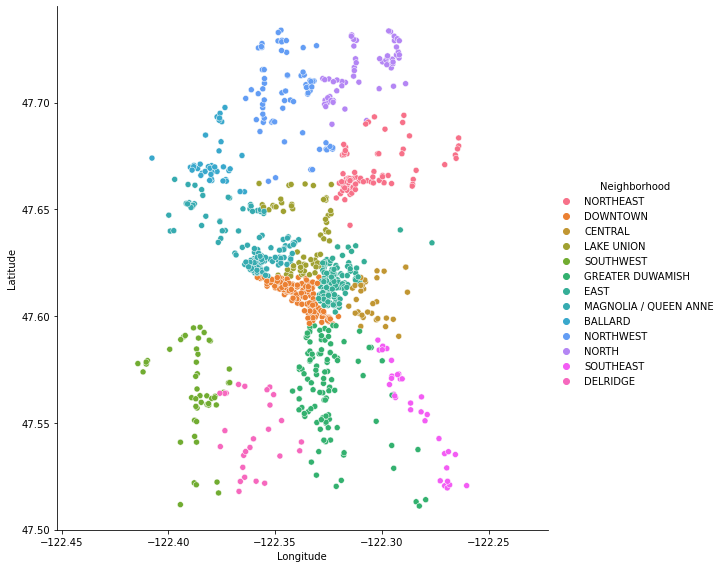


Predicted


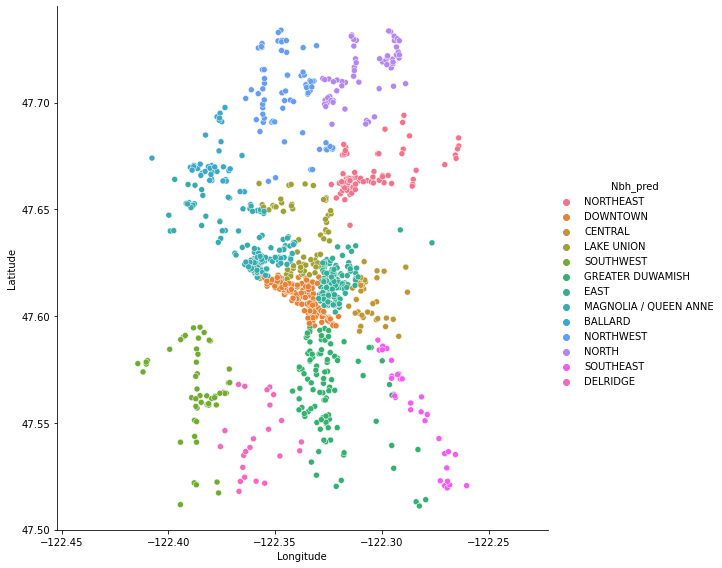

In [128]:
import seaborn as sns
print_subtitle('Real')
sns.relplot(x='Longitude', y='Latitude', hue='Neighborhood', data=loc_pred, height=8)
plt.axis('equal')
plt.show()

print_subtitle('Predicted')
sns.relplot(x='Longitude', y='Latitude', hue='Nbh_pred', data=loc_pred, height=8)
plt.axis('equal')
plt.show()

In [141]:
# TODO : petite fonction, avec graphique (optionnel) et retour du diff systématique
def compare_real_pred(y_pred, y_test):
    compare = pd.concat([pd.Series(y_test, name='y_test'), pd.Series(y_pred, name='y_pred')], axis=1)
    compare['err'] = y_pred - y_test
    compare['% err'] = compare.err / y_test
    #display(compare)
    return compare

def print_accuracy(y_pred, y_test):
    compare = compare_real_pred(y_pred, y_test)
    nb_ok = compare[compare.err == 0].err.count()
    nb_ko = compare[compare.err != 0].err.count()
    #display(compare.err.value_counts())
    print('nb ok :', nb_ok)
    print('nb ko :', nb_ko)
    print('perf :', round(100 * nb_ok / (nb_ok + nb_ko), 2), '%')



## District

On vérifie que tout fonctionne et que les fonctions permettent une bonne densité du code.

* <mark>TODO</mark> : ajouter DecisionBoundaryDisplay, ça pête pour une présentation
* <mark>TODO</mark> : essayer le radius pour voir si on peut faire encore mieux

### Collecte et préparation des données

In [138]:
from sklearn import model_selection, preprocessing
loc = _data[['Latitude', 'Longitude', 'CouncilDistrictCode']]
X = loc[loc.columns[:2]].values
y = loc.CouncilDistrictCode
X_train, X_test, y_train, y_test, id_train, id_test = model_selection.train_test_split(X, y, id, test_size=.3)
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

### Prédicteur et ajustement

In [139]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

### Prédiction

In [140]:
y_pred = clf.predict(X_test_std)
#neighbor_pred = decode_cat(y_pred, id_test, y_cat_map, 'Neighborhood')
#display(neighbor_pred)

loc_pred = _data.loc[id_test, ['Latitude', 'Longitude', 'CouncilDistrictCode']]
loc_pred['District_pred'] = y_pred
display(loc_pred)

,Latitude,Longitude,CouncilDistrictCode,District_pred
2468,47.61460,-122.32661,3,3
366,47.72490,-122.34332,5,5
1802,47.62801,-122.35701,7,7
1422,47.53439,-122.37699,1,1
404,47.62000,-122.33027,7,7
...,...,...,...,...
2091,47.61932,-122.32257,3,3
3331,47.60246,-122.31771,3,3
3006,47.61455,-122.31043,3,3
2693,47.59491,-122.30971,3,3


### Performance

In [142]:
print_accuracy(y_pred, y_test)

nb ok : 945
nb ko : 19
perf : 98.03 %


### Visualisation


Real


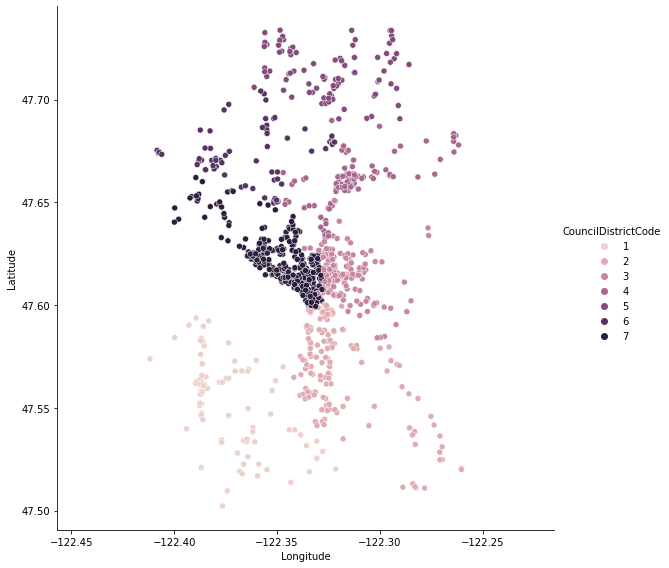


Predicted


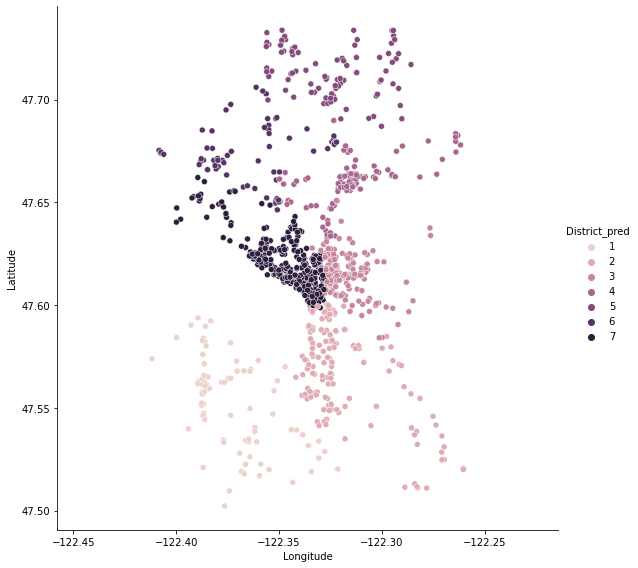

In [143]:
import seaborn as sns
print_subtitle('Real')
sns.relplot(x='Longitude', y='Latitude', hue='CouncilDistrictCode', data=loc_pred, height=8)
plt.axis('equal')
plt.show()

print_subtitle('Predicted')
sns.relplot(x='Longitude', y='Latitude', hue='District_pred', data=loc_pred, height=8)
plt.axis('equal')
plt.show()

# 26/09 focus régression linéaire

* conso d’énergie en fonction des surfaces par usage
* Matrice de confusion
* Site vs. Source, avec comparaison avec ma dummy intelligente
* Tester la régression linéaire ordinaire et d’arête.


Rappel :
* Surfaces
    - $s$ ⚪ `'s'` ⚪ `'PropertyGFATotal'` ⚪ $s=s_e+s_i$
    - $s_e$ ⚪`'s_e'` ⚪ `'PropertyGFAParking'`
    - $s_i$ ⚪ `'s_i'` ⚪ `'PropertyGFABuilding(s)'`
    - $s_u$ ⚪ `'s_u'` ⚪ $\sum_{u_k \in U}{s_{u_k}}$
    - $U=\{u_k, k=0, ...\}$ ⚪ `'u_0', ...` ⚪ Ensemble des labels d'usages, ordonnés par surface totale décroissante.
    - $u_{\text{1st}}, u_{\text{2nd}}, u_{\text{3rd}}$ ⚪ `'u_1st', u_2nd, u_3rd` ⚪ `'LargestPropertyUseType'`, etc
    - $s_{\text{1st}}, s_{\text{2nd}}, s_{\text{3rd}}$ ⚪ `'s_1st', s_2nd, s_3rd` ⚪ `'LargestPropertyUseTypeGFA'`, etc~
* Energies
    - $e$ ⚪ `'e'` ⚪ `'SiteEnergyUse(kBtu)'` ⚪ $e=e_e+e_s+e_g$
    - $e_e$ ⚪ `'e_e'` ⚪ `'Electricity(kBtu)'`
    - $e_s$ ⚪ `'e_s'` ⚪ `'SteamUse(kBtu)'`
    - $e_g$ ⚪ `'e_g'` ⚪ `'NaturalGas(kBtu)'`
    - $es$ ⚪ `'es'` ⚪ $s \times ies$
    - $ies$ ⚪ `'ies'` ⚪ `'SourceEUI(kBtu/sf)'`

On cherche d'abord à prédire les targets $e_e$, $e_s$, $e_g$ en fonction de $s_k, k \in \left[1, \cdots, 67\right]$

## $e_e = f(s_k, k \in \left[1, \cdots, 67\right])$

### Régression liénaire ordinaire

R2 = -2,38 : pas valable : d'une exécution à l'autre, j'obtiens des résultats très différents !

In [168]:
from sklearn import metrics
def print_perf_measures(y_real, y_pred):
    measures = {
        'RMSE': metrics.mean_squared_error(y_real, y_pred),
        'R2': metrics.r2_score(y_real, y_pred)
    }
    print(bold('performances'), ':')
    for k, m in measures.items():
        print(f'\t{k} :', round(m, 2))

In [183]:
# 1. récupérer la matrice des surfaces (en valeur absolue)
from use_types_analysis import use_table_2
use_table = use_table_2(_data, only_table=True)
#display(use_table)

# .. et e_e en tant que target
e_e = _data['Electricity(kBtu)']

# 2. identifier et nettoyer les NA : aucun - faire un truc générique réutilisable par copier coller
feat_has_na = use_table.isna().any(axis=1)
tgt_has_na = e_e.isna()
no_na = ~(feat_has_na | tgt_has_na)
#display(use_table[feat_has_na])
#display(e_e[tgt_has_na])
#na_index = list(set(use_table[feat_has_na].index) | set(e_e[tgt_has_na].index))
# display(use_table[no_na])
X = use_table[no_na].values
y = e_e[no_na].values
id = use_table[no_na].index

# display(X)
# display(y)

# 3. séparation, normalisation
from sklearn import model_selection
X_train, X_test, y_train, y_test, id_train, id_test = model_selection.train_test_split(X, y, id, test_size=.3)

from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

# 4. grid search (la spécialisée, il me semble pour le ridge)
# user guide : https://scikit-learn.org/stable/modules/grid_search.html#alternatives-to-brute-force-parameter-search
# linear_model.RidgeCV et linear_model.RidgeClassifierCV, idem pour Lasso etc

# on commence avec la régression linéaire ordinaire, et on testera toutes les autres
# nb : pour l'ordinaire, pas d'hyperparamètre
from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X_train_std, y_train)
print(bold('score'), ':', reg.score(X_train_std, y_train))
#print(bold('coefs'), ':', reg.coef_)
print(bold('intercept'), ':', reg.intercept_)

y_pred = reg.predict(X_test_std)

# 5. performance et visualisation des résultats
#print_accuracy(y_pred, y_test) # ici, sur de la régression, c'est débile : faire une fonction cf. cours.
print_perf_measures(y_test, y_pred)

# x 6 intégration de la matrice de confusion (ben non, ce n'est pas adapté : c'est pour la classif.)

score : 0.9506438499683676
intercept : 3973047.830033211
performances :
	RMSE : 1.194879368582891e+46
	R2 : -1.672435216653333e+32


### Régression Ridge (réduction de Tikhonov)

## $e_e/s = f(s_k/s, k \in \left[1, \cdots, 67\right])$


### Régression liénaire ordinaire

R2 = -1,1 : idem, pas valable, ça change significativement à chaque exécution.

Mais pourquoi ça change tant ? Il faut pouvoir visualiser, c'est l'enseignement d'Ascombe.

In [188]:
# 0 le normalisateur de base, la surface totale du bien
s = _data.PropertyGFATotal

# 1. récupérer la matrice des surfaces (en valeur absolue)
from use_types_analysis import use_table_2
use_table = use_table_2(_data, only_table=True)
iuse_table = use_table.div(s, axis=0)
#display(use_table)

# .. et e_e en tant que target
ie_e = _data['Electricity(kBtu)'] / s

# 2. identifier et nettoyer les NA : aucun - faire un truc générique réutilisable par copier coller
feat_has_na = iuse_table.isna().any(axis=1)
tgt_has_na = ie_e.isna()
no_na = ~(feat_has_na | tgt_has_na)
#display(use_table[feat_has_na])
#display(e_e[tgt_has_na])
#na_index = list(set(use_table[feat_has_na].index) | set(e_e[tgt_has_na].index))
# display(use_table[no_na])
X = iuse_table[no_na].values
y = ie_e[no_na].values
id = iuse_table[no_na].index

# display(X)
# display(y)

# 3. séparation, normalisation
from sklearn import model_selection
X_train, X_test, y_train, y_test, id_train, id_test = model_selection.train_test_split(X, y, id, test_size=.3)

from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

# 4. grid search (la spécialisée, il me semble pour le ridge)
# user guide : https://scikit-learn.org/stable/modules/grid_search.html#alternatives-to-brute-force-parameter-search
# linear_model.RidgeCV et linear_model.RidgeClassifierCV, idem pour Lasso etc

# on commence avec la régression linéaire ordinaire, et on testera toutes les autres
# nb : pour l'ordinaire, pas d'hyperparamètre
from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X_train_std, y_train)
print(bold('score'), ':', reg.score(X_train_std, y_train))
#print(bold('coefs'), ':', reg.coef_)
print(bold('intercept'), ':', reg.intercept_)

y_pred = reg.predict(X_test_std)

# 5. performance et visualisation des résultats
#print_accuracy(y_pred, y_test) # ici, sur de la régression, c'est débile : faire une fonction cf. cours.
print_perf_measures(y_test, y_pred)

# x 6 intégration de la matrice de confusion (ben non, ce n'est pas adapté : c'est pour la classif.)

score : 0.5858482814139809
intercept : 34.24132949482408
performances :
	RMSE : 721.51
	R2 : 0.54
